<a href="https://colab.research.google.com/github/chalika-vanyaa/Rakamin_AcademyxIDX_Partners-Credit_Risk_Prediction_Model/blob/main/Final_Task_ID_X_Partners_Data_Scientist_Chalika_Vanya_Resya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Risk Prediction Model**


*   Nama: Chalika Vanya Resya
*   Email: chalikavanya@gmail.com



## **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from google.colab import drive

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split, StratifiedKFold, learning_curve, cross_val_predict, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

!pip install xgboost
from xgboost import XGBClassifier

## **About Dataset**

Features:
- `id`: The most recent month LC pulled credit for this loan
- `member_id`: A unique LC assigned Id for the borrower member.
- `loan_amnt`: The listed amount of the loan applied for by the borrower.
- `funded_amnt`: The total amount committed to that loan at that point in time.
- `funded_amnt_inv`:
- `term`: The number of payments on the loan. Values are in months and can be either 36 or 60.
- int_rate: Indicates if income was verified by LC, not verified, or if the income source was verified
- `installment`:	The monthly payment owed by the borrower if the loan originates.
- `grade`:	LC assigned loan grade
- `sub_grade`:	LC assigned loan subgrade
- `emp_title`:	The job title supplied by the Borrower when applying for the loan.*
- `emp_length`:	Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
- `home_ownership`:	The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
- `annual_inc`:	The self-reported annual income provided by the borrower during registration.
- `verification_status`:	apakah status sudah di verifikasi
- `issue_d`:	bulan didanainya pinjaman
- `loan_status`:	status pinjaman saat ini
- `pymnt_plan`:	perencanaan pembayaran
- `url`:	web id
- `desc`:	deskripsi alasan peminjaman
- `purpose`:	kategori peminjaman
- `title`:	judul pinjaman
- `zip_code`:	kode pos
- `addr_state`:	alamat negara
- `dti`:	A ratio calculated using the borrower's total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower's self-reported monthly income.
- `delinq_2yrs`:	The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
- `earliest_cr_line`:	The month the borrower's earliest reported credit line was opened
- `inq_last_6mths`:	The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
- `mths_since_last_delinq`:	The number of months since the borrower's last delinquency.
- `mths_since_last_record`:	The number of months since the last public record.
- `open_acc`:	The number of open credit lines in the borrower's credit file.
- `pub_rec`:	Number of derogatory public records
- `revol_bal`:	Total credit revolving balance
- `revol_util`:	Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.        
- `total_acc`:	The total number of credit lines currently in the borrower's credit file
- `initial_list_status`:	The initial listing status of the loan. Possible values are – Whole, Fractional
- `out_prncp`:	Remaining outstanding principal for total amount funded
- `out_prncp_inv`:	Remaining outstanding principal for portion of total amount funded by investors
- `total_pymnt`:	 Payments received to date for total amount funded
- `total_pymnt_inv`:	Payments received to date for portion of total amount funded by investors
- `total_rec_int`:	Interest received to date
- `total_rec_late_fee`:	Late fees received to date
- `total_rec_prncp`:	Principal received to date
- `recoveries`:	Indicates if a payment plan has been put in place for the loan
- `collection_recovery_fee`:	post charge off collection fee
- `last_pymnt_d`:	Last month payment was received
- `last_pymnt_amnt`:	Jumlah total pembayaran terakhir yang diterima
- `next_pymnt_d`:	Next scheduled payment date
- `last_credit_pull_d`:	kapan hari terakhir LC menge'check' credit history
- `collections_12_mths_ex_med`:	Number of collections in 12 months excluding medical collections
- `mths_since_last_major_derog`:	Months since most recent 90-day or worse rating
- `policy_code`:	"publicly available policy_code=1
new products not publicly available policy_code=2"
- `application_type`:	Indicates whether the loan is an individual application or a joint application with two co-borrowers
- `annual_inc_joint`:	The combined self-reported annual income provided by the co-borrowers during registration
- `dti_join`:	A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income
- `verification_status_join`:	Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified
- `acc_now_deilnq`:	The number of accounts on which the borrower is now delinquent.
- `tot_coll_amt`:	Total collection amounts ever owed
- `tot_cur_bal`:	Total current balance of all accounts
- `open_acc_6m`:	Number of open trades in last 6 months
- `open_il_6m`:	Number of installment accounts opened in past 6 months
- `open_il_12m`:	Number of installment accounts opened in past 12 months
- `open_il_24m`:	Number of installment accounts opened in past 24 months
- `mths_since_rcnt_il`:	Months since most recent installment accounts opened
- `total_bal_il`:	Total current balance of all installment accounts
- `il_util`:	Ratio of total current balance to high credit/credit limit on all install acct
- `open_rv_12m`:	Number of revolving trades opened in past 12 months
- `open_rv_24m`:	Number of revolving trades opened in past 24 months
- `max_bal_bc`:	Maximum current balance owed on all revolving accounts
- `all_util`:	Balance to credit limit on all trades
- `total_rev_hi_lim`:	Total revolving high credit/credit limit
- `inq_fi`:	Number of personal finance inquiries
- `total_cu_tl`:	Number of finance trades
- `inq_last_12m`:	Number of credit inquiries in past 12 months

## **Data Loading**

In [ ]:
# mount drive
drive.mount('/content/drive')

# define file directory
fileName = '/content/drive/MyDrive/Online Courses/Rakamin Academy x IDX Partners/Final Project/'
os.chdir(fileName)

Mounted at /content/drive


In [ ]:
# load csv file
df = pd.read_csv('loan_data_2007_2014.csv')
df.head()

<ipython-input-3-816b4dff3c0e>:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan_data_2007_2014.csv')


Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

         term  int_rate  installment grade  ... total_bal_il il_util  \
0   36 months     10.65       162.87     B  ...          NaN     NaN   
1   60 months     15.27        59.83     C  ...          NaN     NaN   
2   36 months     15.96        84.33     C  ...          NaN     NaN   
3   36 months     13.49       339.31     C  ...          NaN     NaN   
4   60 months     12.69        67.79     B  ...          NaN     NaN   

  open_rv_12m open_rv_24m  max_bal_bc all_util total_rev_hi_lim inq_fi  \
0         NaN         NaN         NaN      NaN              NaN    NaN   
1         NaN         NaN         NaN      NaN              NaN    NaN   
2         NaN         NaN         NaN      NaN              NaN    NaN   
3         NaN         NaN         NaN      NaN              NaN    NaN   
4         NaN         NaN         NaN      NaN              NaN    NaN   

  total_cu_tl inq_last_12m  
0         NaN          NaN  
1         NaN          NaN  
2         NaN          NaN  
3         NaN          NaN  
4         NaN          NaN  

[5 rows x 75 columns]

## **Data Understanding**

In [ ]:
# basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

> Dataset terdiri dari 74 kolom dengan berbagai tipe data, termasuk float, integer, dan object. Dataset secara total memuat 466.285 baris. Dari informasi ini, ditemukan beberapa kolom yang memiliki *missing values*, bahkan beberapa di antaranya merupakan kolom kosong tanpa data sama sekali.

In [ ]:
# drop column 'Unnamed: 0', 'id' and 'member_id'
df = df.drop(columns=['Unnamed: 0', 'id', 'member_id'])

> Tiga kolom, yaitu `Unnamed: 0`, `id`, dan `member_id`, tidak akan digunakan dalam proses pengklasifikasian. Oleh karena itu, ketiga kolom ini dihapus dari dataset agar tidak memengaruhi proses analisis dan pemodelan.

In [ ]:
# statistical descriptive of numerical columns
df.describe().T

count           mean            std      min  \
loan_amnt                    466285.0   14317.277577    8286.509164   500.00   
funded_amnt                  466285.0   14291.801044    8274.371300   500.00   
funded_amnt_inv              466285.0   14222.329888    8297.637788     0.00   
int_rate                     466285.0      13.829236       4.357587     5.42   
installment                  466285.0     432.061201     243.485550    15.67   
annual_inc                   466281.0   73277.381470   54963.568654  1896.00   
dti                          466285.0      17.218758       7.851121     0.00   
delinq_2yrs                  466256.0       0.284678       0.797365     0.00   
inq_last_6mths               466256.0       0.804745       1.091598     0.00   
mths_since_last_delinq       215934.0      34.104430      21.778487     0.00   
mths_since_last_record        62638.0      74.306012      30.357653     0.00   
open_acc                     466256.0      11.187069       4.987526     0.00   
pub_rec                      466256.0       0.160564       0.510863     0.00   
revol_bal                    466285.0   16230.203487   20676.245152     0.00   
revol_util                   465945.0      56.176947      23.732628     0.00   
total_acc                    466256.0      25.064430      11.600141     1.00   
out_prncp                    466285.0    4410.062342    6355.078769     0.00   
out_prncp_inv                466285.0    4408.452258    6353.198001     0.00   
total_pymnt                  466285.0   11540.686220    8265.627112     0.00   
total_pymnt_inv              466285.0   11469.892747    8254.157579     0.00   
total_rec_prncp              466285.0    8866.014657    7031.687997     0.00   
total_rec_int                466285.0    2588.677225    2483.809661     0.00   
total_rec_late_fee           466285.0       0.650129       5.265730     0.00   
recoveries                   466285.0      85.344211     552.216084     0.00   
collection_recovery_fee      466285.0       8.961534      85.491437     0.00   
last_pymnt_amnt              466285.0    3123.913796    5554.737393     0.00   
collections_12_mths_ex_med   466140.0       0.009085       0.108648     0.00   
mths_since_last_major_derog   98974.0      42.852547      21.662591     0.00   
policy_code                  466285.0       1.000000       0.000000     1.00   
annual_inc_joint                  0.0            NaN            NaN      NaN   
dti_joint                         0.0            NaN            NaN      NaN   
verification_status_joint         0.0            NaN            NaN      NaN   
acc_now_delinq               466256.0       0.004002       0.068637     0.00   
tot_coll_amt                 396009.0     191.913517   14630.214605     0.00   
tot_cur_bal                  396009.0  138801.713385  152114.663494     0.00   
open_acc_6m                       0.0            NaN            NaN      NaN   
open_il_6m                        0.0            NaN            NaN      NaN   
open_il_12m                       0.0            NaN            NaN      NaN   
open_il_24m                       0.0            NaN            NaN      NaN   
mths_since_rcnt_il                0.0            NaN            NaN      NaN   
total_bal_il                      0.0            NaN            NaN      NaN   
il_util                           0.0            NaN            NaN      NaN   
open_rv_12m                       0.0            NaN            NaN      NaN   
open_rv_24m                       0.0            NaN            NaN      NaN   
max_bal_bc                        0.0            NaN            NaN      NaN   
all_util                          0.0            NaN            NaN      NaN   
total_rev_hi_lim             396009.0   30379.087771   37247.129571     0.00   
inq_fi                            0.0            NaN            NaN      NaN   
total_cu_tl                       0.0            NaN            NaN      NaN   
inq_last_12m                    

In [ ]:
# statistical descriptive of object columns
df.describe(include='object').T

count  unique  \
term                 466285       2   
grade                466285       7   
sub_grade            466285      35   
emp_title            438697  205475   
emp_length           445277      11   
home_ownership       466285       6   
verification_status  466285       3   
issue_d              466285      91   
loan_status          466285       9   
pymnt_plan           466285       2   
url                  466285  466285   
desc                 125981  124435   
purpose              466285      14   
title                466264   63098   
zip_code             466285     888   
addr_state           466285      50   
earliest_cr_line     466256     664   
initial_list_status  466285       2   
last_pymnt_d         465909      98   
next_pymnt_d         239071     100   
last_credit_pull_d   466243     103   
application_type     466285       1   

                                                                   top    freq  
term                                                         36 months  337953  
grade                                                                B  136929  
sub_grade                                                           B3   31686  
emp_title                                                      Teacher    5399  
emp_length                                                   10+ years  150049  
home_ownership                                                MORTGAGE  235875  
verification_status                                           Verified  168055  
issue_d                                                         Oct-14   38782  
loan_status                                                    Current  224226  
pymnt_plan                                                           n  466276  
url                  https://www.lendingclub.com/browse/loanDetail....       1  
desc                                                                       234  
purpose                                             debt_consolidation  274195  
title                                               Debt consolidation  164075  
zip_code                                                         945xx    5304  
addr_state                                                          CA   71450  
earliest_cr_line                                                Oct-00    3674  
initial_list_status                                                  f  303005  
last_pymnt_d                                                    Jan-16  179620  
next_pymnt_d                                                    Feb-16  208393  
last_credit_pull_d                                              Jan-16  327699  
application_type                                            INDIVIDUAL  466285

In [ ]:
# display all the columns with missing values
mis_val = df.isna().sum()
col_with_nan = mis_val[mis_val > 0]
col_with_nan

emp_title                       27588
emp_length                      21008
annual_inc                          4
desc                           340304
title                              21
delinq_2yrs                        29
earliest_cr_line                   29
inq_last_6mths                     29
mths_since_last_delinq         250351
mths_since_last_record         403647
open_acc                           29
pub_rec                            29
revol_util                        340
total_acc                          29
last_pymnt_d                      376
next_pymnt_d                   227214
last_credit_pull_d                 42
collections_12_mths_ex_med        145
mths_since_last_major_derog    367311
annual_inc_joint               466285
dti_joint                      466285
verification_status_joint      466285
acc_now_delinq                     29
tot_coll_amt                    70276
tot_cur_bal                     70276
open_acc_6m                    466285
open_il_6m                     466285
open_il_12m                    466285
open_il_24m                    466285
mths_since_rcnt_il             466285
total_bal_il                   466285
il_util                        466285
open_rv_12m                    466285
open_rv_24m                    466285
max_bal_bc                     466285
all_util                       466285
total_rev_hi_lim                70276
inq_fi                         466285
total_cu_tl                    466285
inq_last_12m                   466285
dtype: int64

> Kode di atas memeriksa semua kolom yag memiliki *missing values*. Terlihat bahwa jumlah *missing values* bervariasi, dimulai dari 4 *missing values* hingga sebanyak total baris data (*empty columns*). Hal ini akan diatasi pada tahapan *data preprocessing*.

In [ ]:
# display the formatting of date columns
df[['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'earliest_cr_line']]

issue_d last_pymnt_d next_pymnt_d last_credit_pull_d earliest_cr_line
0       Dec-11       Jan-15          NaN             Jan-16           Jan-85
1       Dec-11       Apr-13          NaN             Sep-13           Apr-99
2       Dec-11       Jun-14          NaN             Jan-16           Nov-01
3       Dec-11       Jan-15          NaN             Jan-15           Feb-96
4       Dec-11       Jan-16       Feb-16             Jan-16           Jan-96
...        ...          ...          ...                ...              ...
466280  Jan-14       Jan-16       Feb-16             Jan-16           Apr-03
466281  Jan-14       Dec-14          NaN             Jan-16           Jun-97
466282  Jan-14       Jan-16       Feb-16             Dec-15           Dec-01
466283  Jan-14       Dec-14          NaN             Apr-15           Feb-03
466284  Jan-14       Jan-16       Feb-16             Jan-16           Feb-00

[466285 rows x 5 columns]

> Beberapa kolom berisi data dalam format bulan-tahun yang perlu dikonversi ke format datetime agar sesuai untuk analisis.

In [ ]:
# display all the unique dates in column 'earliest_cr_line'
df['earliest_cr_line'].sort_values().unique()

array(['Apr-00', 'Apr-01', 'Apr-02', 'Apr-03', 'Apr-04', 'Apr-05',
       'Apr-06', 'Apr-07', 'Apr-08', 'Apr-09', 'Apr-10', 'Apr-11',
       'Apr-55', 'Apr-61', 'Apr-62', 'Apr-63', 'Apr-64', 'Apr-65',
       'Apr-66', 'Apr-67', 'Apr-68', 'Apr-69', 'Apr-70', 'Apr-71',
       'Apr-72', 'Apr-73', 'Apr-74', 'Apr-75', 'Apr-76', 'Apr-77',
       'Apr-78', 'Apr-79', 'Apr-80', 'Apr-81', 'Apr-82', 'Apr-83',
       'Apr-84', 'Apr-85', 'Apr-86', 'Apr-87', 'Apr-88', 'Apr-89',
       'Apr-90', 'Apr-91', 'Apr-92', 'Apr-93', 'Apr-94', 'Apr-95',
       'Apr-96', 'Apr-97', 'Apr-98', 'Apr-99', 'Aug-00', 'Aug-01',
       'Aug-02', 'Aug-03', 'Aug-04', 'Aug-05', 'Aug-06', 'Aug-07',
       'Aug-08', 'Aug-09', 'Aug-10', 'Aug-11', 'Aug-46', 'Aug-58',
       'Aug-60', 'Aug-61', 'Aug-62', 'Aug-63', 'Aug-64', 'Aug-65',
       'Aug-66', 'Aug-67', 'Aug-68', 'Aug-69', 'Aug-70', 'Aug-71',
       'Aug-72', 'Aug-73', 'Aug-74', 'Aug-75', 'Aug-76', 'Aug-77',
       'Aug-78', 'Aug-79', 'Aug-80', 'Aug-81', 'Aug-82', 'Aug-

> Dari kelima kolom tanggal, `earliest_cr_line` memiliki rentang tahun terjauh, dimulai dari tahun 1940-an. Saat menggunakan `pd.to_datetime` pada pandas, tahun dengan akhiran 00-68 dianggap sebagai tahun 2000-an, sedangkan 69 ke atas dianggap sebagai 1900-an. Akibatnya, terjadi kesalahan *parsing* untuk data antara 1940-1968. Oleh karena itu, setelah konversi, perlu dilakukan penyesuaian dengan mengurangi tahun dengan 100 jika tahun yang dihasilkan lebih besar atau sama dengan 2025 (tahun 2025 hanya sebagai acuan). [Referensi](https://stackoverflow.com/questions/37766353/pandas-to-datetime-parsing-wrong-year).

In [ ]:
# convert the date columns to datetype
date_columns = ['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'earliest_cr_line']
for col in date_columns:
  df[col] = pd.to_datetime(df[col], format='%b-%y')

# readjust the year for column 'earliest_cr_line'
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda x: x - pd.DateOffset(years=100) if x.year >= 2025 else x)

# display change
df[['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'earliest_cr_line']]

issue_d last_pymnt_d next_pymnt_d last_credit_pull_d  \
0      2011-12-01   2015-01-01          NaT         2016-01-01   
1      2011-12-01   2013-04-01          NaT         2013-09-01   
2      2011-12-01   2014-06-01          NaT         2016-01-01   
3      2011-12-01   2015-01-01          NaT         2015-01-01   
4      2011-12-01   2016-01-01   2016-02-01         2016-01-01   
...           ...          ...          ...                ...   
466280 2014-01-01   2016-01-01   2016-02-01         2016-01-01   
466281 2014-01-01   2014-12-01          NaT         2016-01-01   
466282 2014-01-01   2016-01-01   2016-02-01         2015-12-01   
466283 2014-01-01   2014-12-01          NaT         2015-04-01   
466284 2014-01-01   2016-01-01   2016-02-01         2016-01-01   

       earliest_cr_line  
0            1985-01-01  
1            1999-04-01  
2            2001-11-01  
3            1996-02-01  
4            1996-01-01  
...                 ...  
466280       2003-04-01  
466281       1997-06-01  
466282       2001-12-01  
466283       2003-02-01  
466284       2000-02-01  

[466285 rows x 5 columns]

In [ ]:
# recheck if conversion went as expected for earliest_cr_line
df['earliest_cr_line'].sort_values(ascending=False).unique()

<DatetimeArray>
['2011-11-01 00:00:00', '2011-10-01 00:00:00', '2011-09-01 00:00:00',
 '2011-08-01 00:00:00', '2011-07-01 00:00:00', '2011-06-01 00:00:00',
 '2011-05-01 00:00:00', '2011-04-01 00:00:00', '2011-03-01 00:00:00',
 '2011-02-01 00:00:00',
 ...
 '1950-12-01 00:00:00', '1950-11-01 00:00:00', '1950-10-01 00:00:00',
 '1950-05-01 00:00:00', '1949-06-01 00:00:00', '1948-01-01 00:00:00',
 '1946-08-01 00:00:00', '1946-01-01 00:00:00', '1944-01-01 00:00:00',
                 'NaT']
Length: 665, dtype: datetime64[ns]

## **Exploratory Data Analysis**

### **Univariate Analysis**

> Bagian ini menampilkan beberapa visualisasi untuk memahami karakteristik data secara univariat, berupa:

- Histogram: distribusi kolom numerik
- Boxplot: mendeteksi outliers
- Bar plot (countplot): distribusi data kategorikal

#### **Histogram**

In [ ]:
non_empty_cols = df.columns[df.notna().any()] # store only non empty columns
num_columns = df[non_empty_cols].drop(columns=['policy_code']).select_dtypes('number').columns # non empty numerical columns

In [ ]:
# numerical columns distribution plot: histogram
def plot_histogram(df, col_list):
  n_cols = 4
  n_rows = int(np.ceil(len(col_list) / n_cols))

  fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*4))

  # flatten axes for easier iteration
  axes = axes.flatten()

  # histogram plotting
  for i, feature in enumerate(col_list):
    sns.histplot(x=df[feature], ax=axes[i], kde=True, bins=20, color='teal')
    axes[i].set_title(feature)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Count')

  # remove unused subplots if exists
  for j in range(len(col_list), len(axes)):
    fig.delaxes(axes[j]) # remove empty axes

  plt.tight_layout(pad=2.0)
  plt.show()

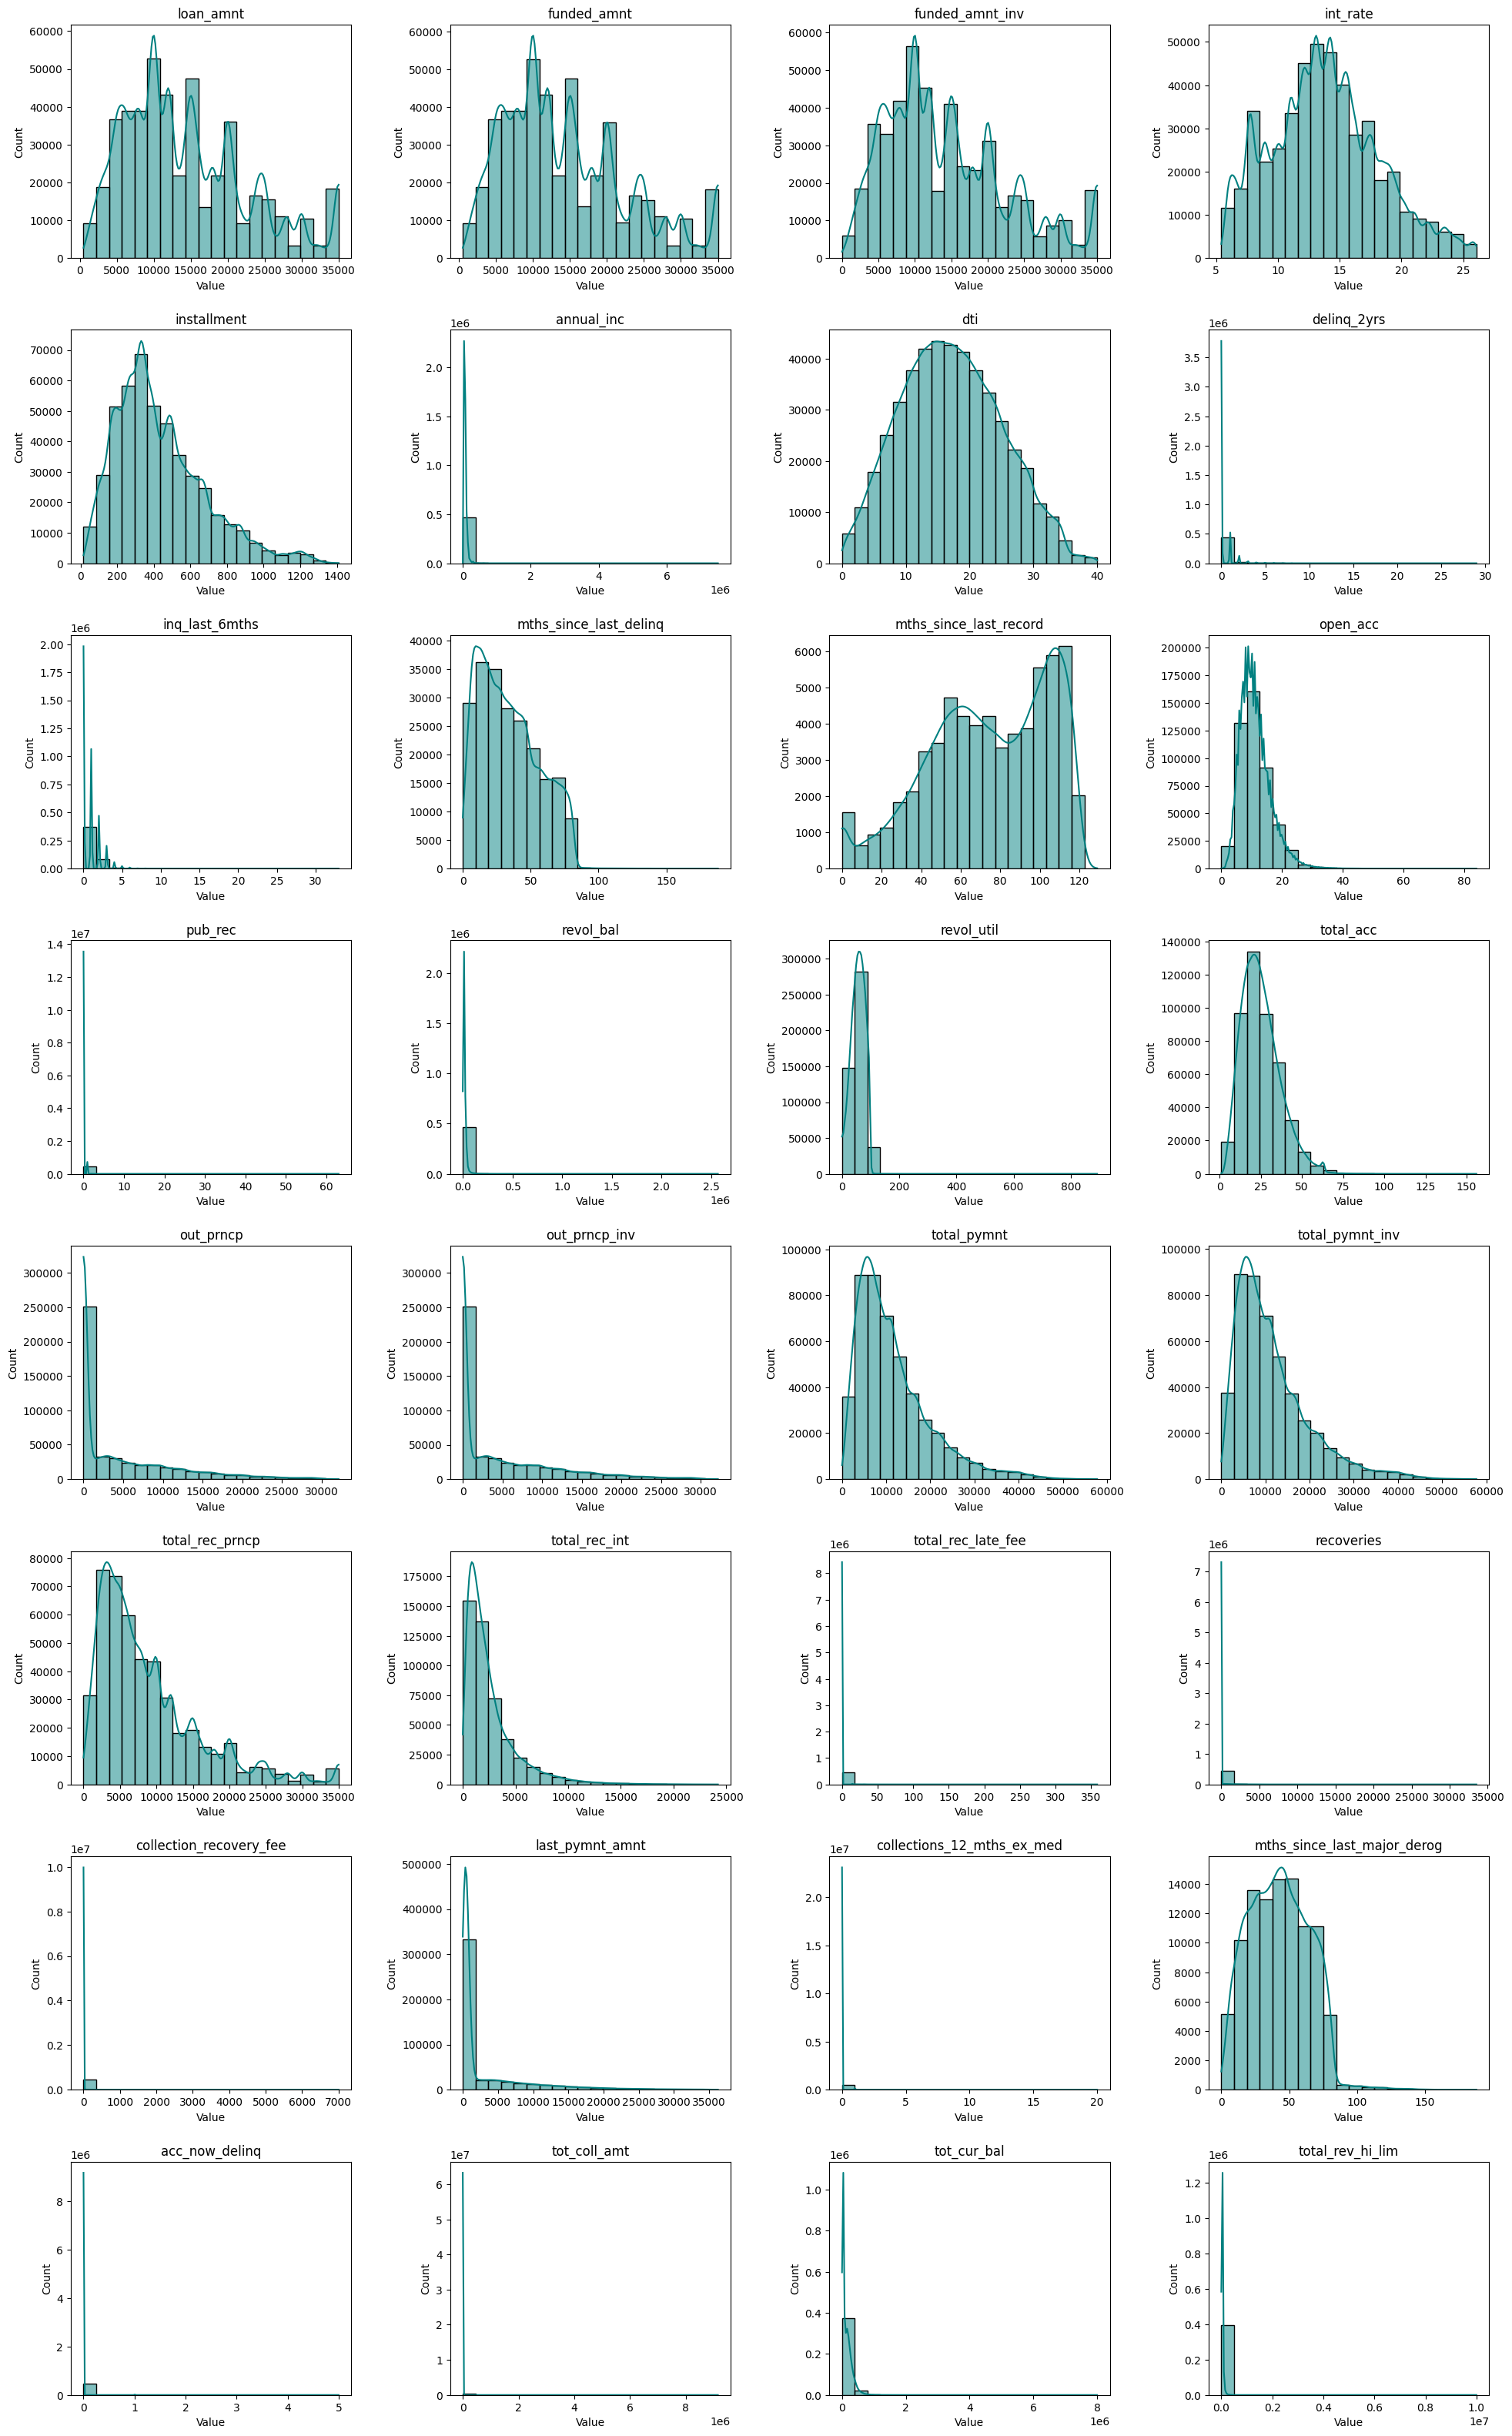

In [ ]:
# function call
plot_histogram(df, num_columns)

> Histogram di atas menampilkan distribusi data untuk kolom numerik yang bukan *empty columns*. Terlihat bahwa distribusi data cukup beragam, ada yang mendekati norma, tetapi juga ada yang sangat *skewed*. Informasi ini berguna saat tahapan *data preprocessing*, terutama saat mengatasi *missing values* dan *outliers*.

#### **Boxplot**

In [ ]:
# plot outliers using boxplot
def plot_outliers(df, col_list):
  n_cols = 4
  n_rows = int(np.ceil(len(col_list) / n_cols))

  fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*4))

  # flatten axes for easier iteration
  axes = axes.flatten()

  # outlier plotting using boxplot
  for i, feature in enumerate(col_list):
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(feature)

  # remove unused subplots if exists
  for j in range(len(col_list), len(axes)):
    fig.delaxes(axes[j]) # remove empty axes

  plt.tight_layout(pad=2.0)
  plt.show()

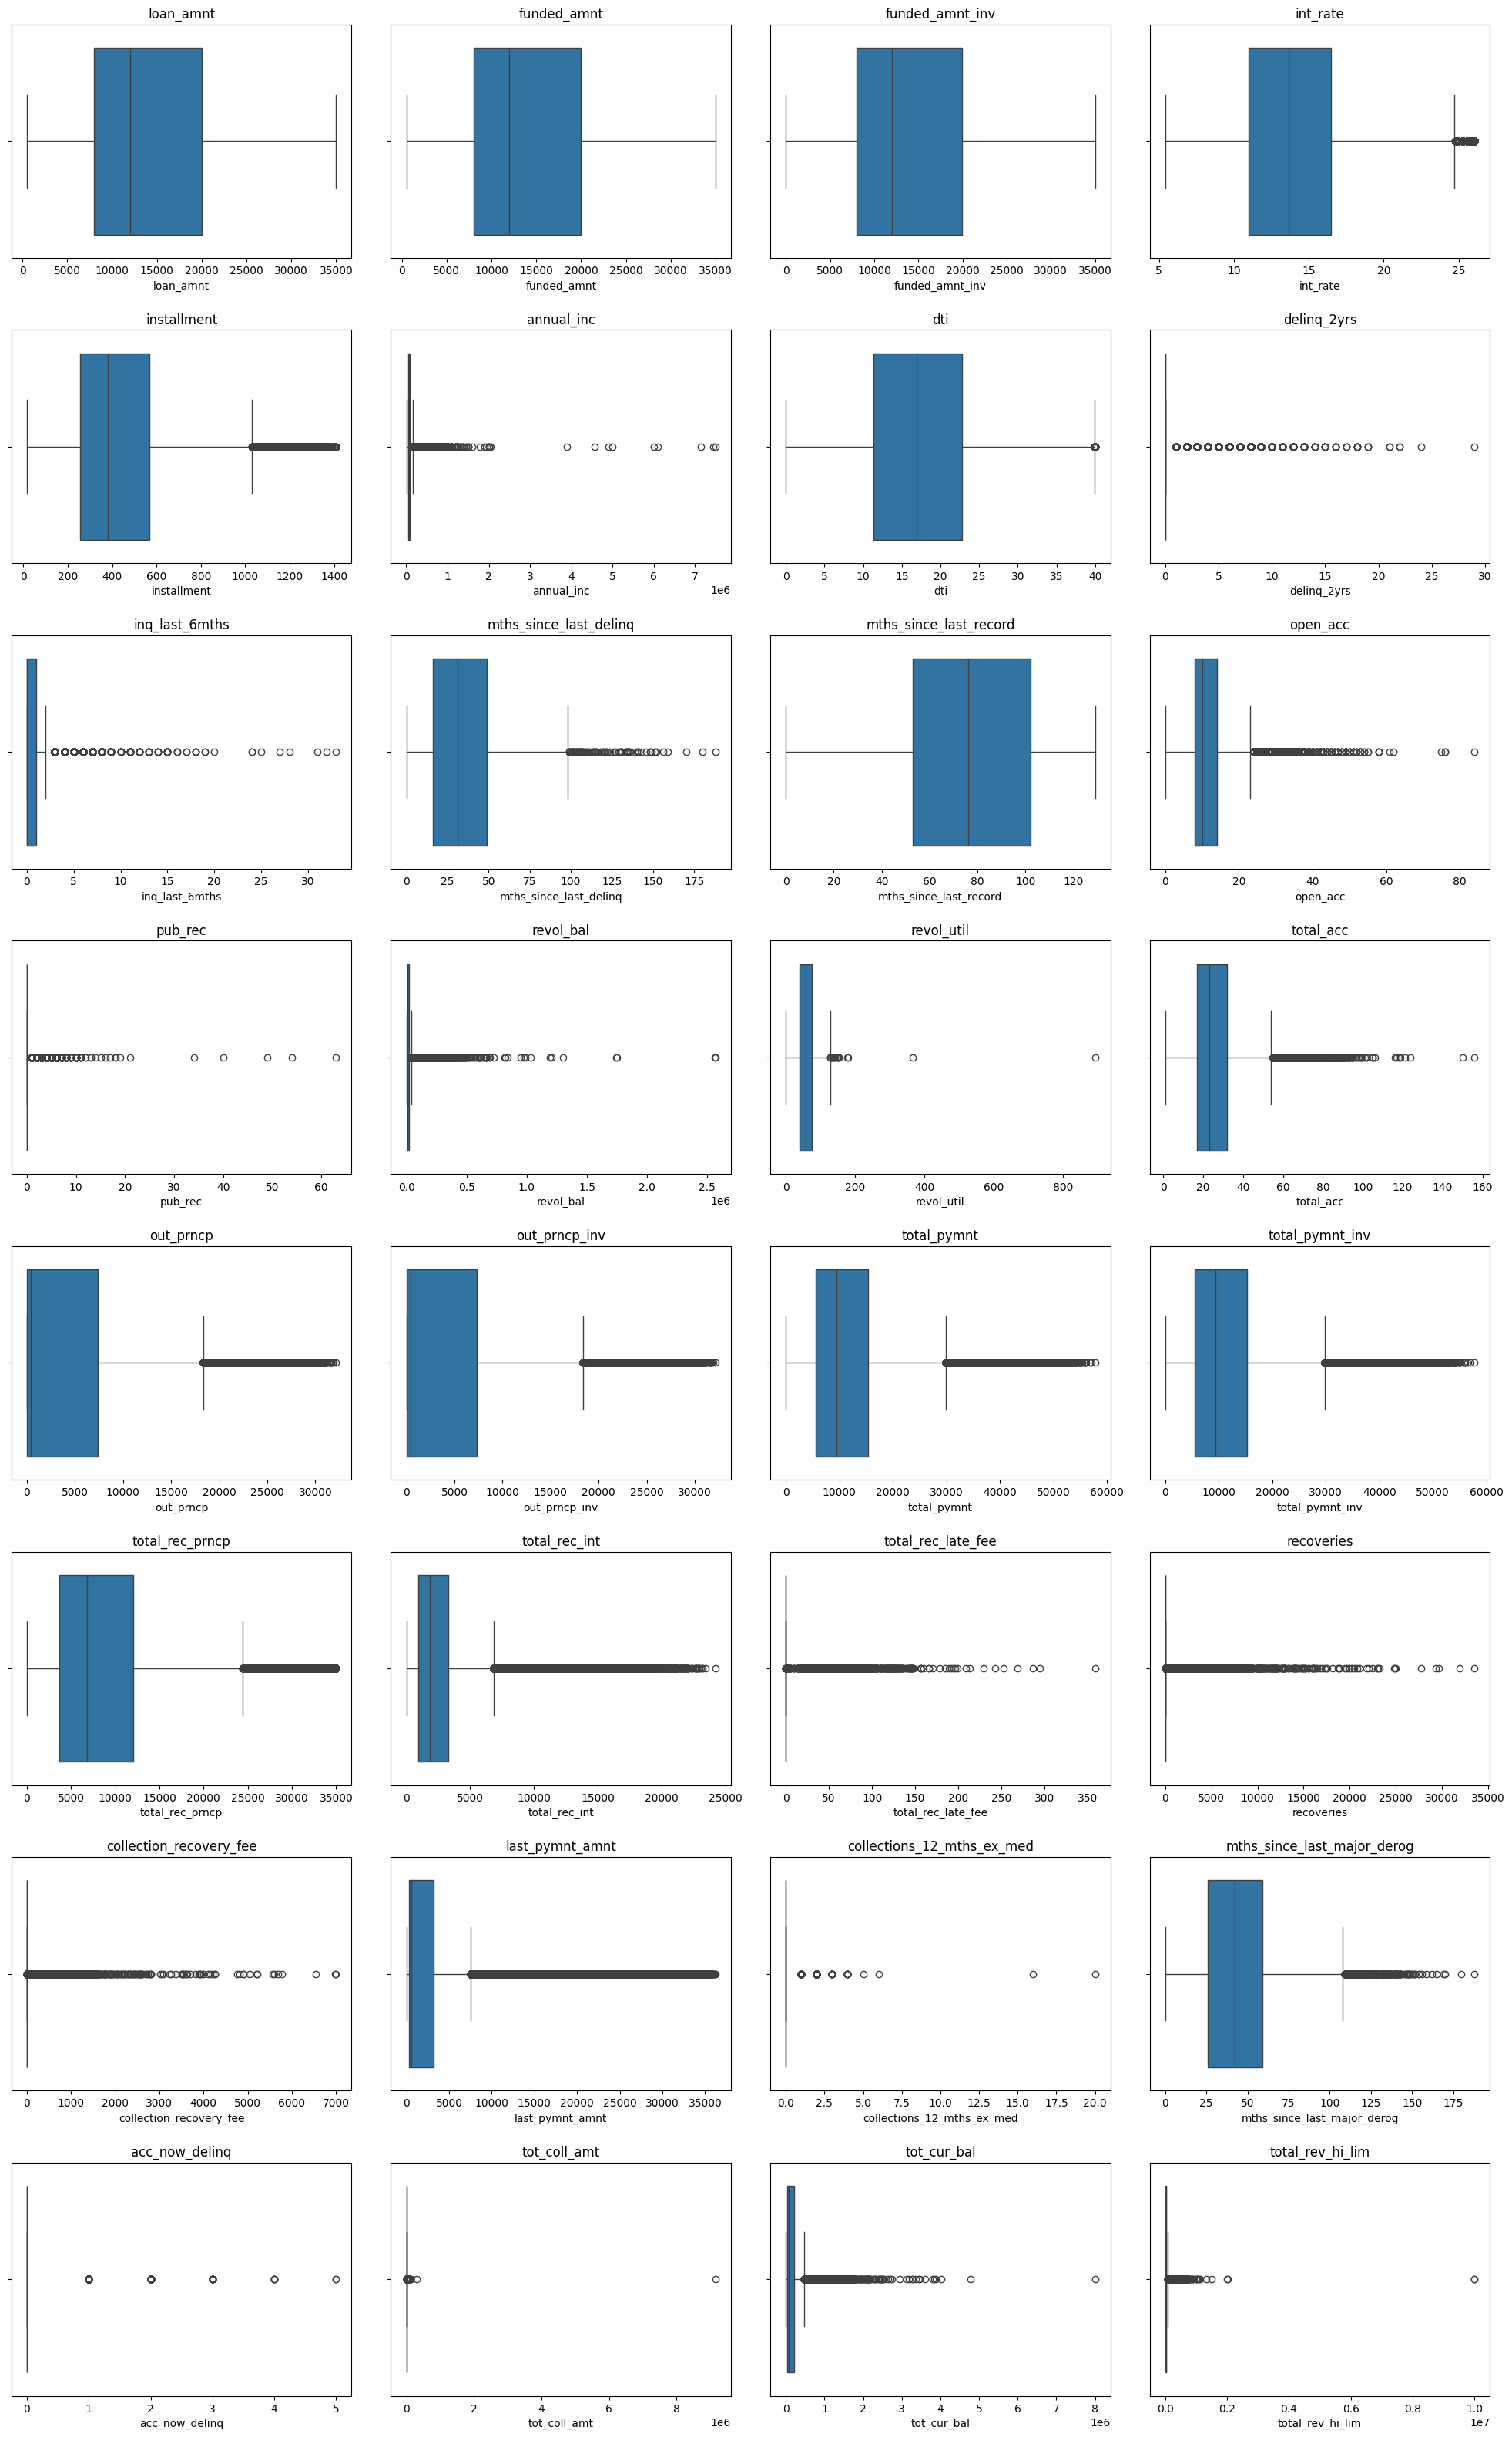

In [ ]:
# function call
plot_outliers(df, num_columns)

> Visualisasi boxplot digunakan untuk mendeteksi *outliers* pada setiap kolom numerik. Terlihat bahwa beberapa kolom tidak memiliki *outliers* sama sekali, sementara yang lain memiliki *outliers* dalam jumlah yang sangat banyak dan berdekatan atau sangat banyak tetapi berjauhan. Analisis ini membantu dalam menentukan pendekatan terbaik untuk menangani *outliers* dalam tahap data preprocessing.

#### **Categorical Data Distribution**

In [ ]:
cat_columns = df.select_dtypes('object').columns # categorical columns
cat_columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'initial_list_status', 'application_type'],
      dtype='object')

In [ ]:
# categorical data distribution: countplot
def plot_cat_dist(df, col_list):
  n_cols = 2
  n_rows = int(np.ceil(len(col_list) / n_cols))

  fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows*5))

  # flatten axes for easier iteration
  axes = axes.flatten()

  for i, feat in enumerate(col_list):
    # display only the top 10 values for each column
    if df[feat].nunique() > 10:
      top_10 = df[feat].value_counts().nlargest(10).index
      filtered_df = df[df[feat].isin(top_10)]
    else:
      filtered_df = df

    ax = sns.countplot(y=filtered_df[feat], ax=axes[i], hue=filtered_df[feat], palette='viridis')
    axes[i].set_title(f'{feat} Distribution')

    # add labels to each bar
    for p in ax.patches:
      for bar in ax.patches:
        value = bar.get_width() # count value for each bar
        pos = bar.get_x() + value # determine the position, at the end of the bar

        # only show the labels that are within 90% of the border
        if pos < ax.get_xlim()[1] * 0.9:
          ax.text(value,
                  bar.get_y() + bar.get_height() / 2, # position the label at the center of the bar
                  f'{int(value)}',
                  ha='left', va='center', fontsize=10)

  # remove unused subplots if exists
  for j in range(len(col_list), len(axes)):
    fig.delaxes(axes[j]) # remove empty axes

  plt.tight_layout(pad=2.0)
  plt.show()

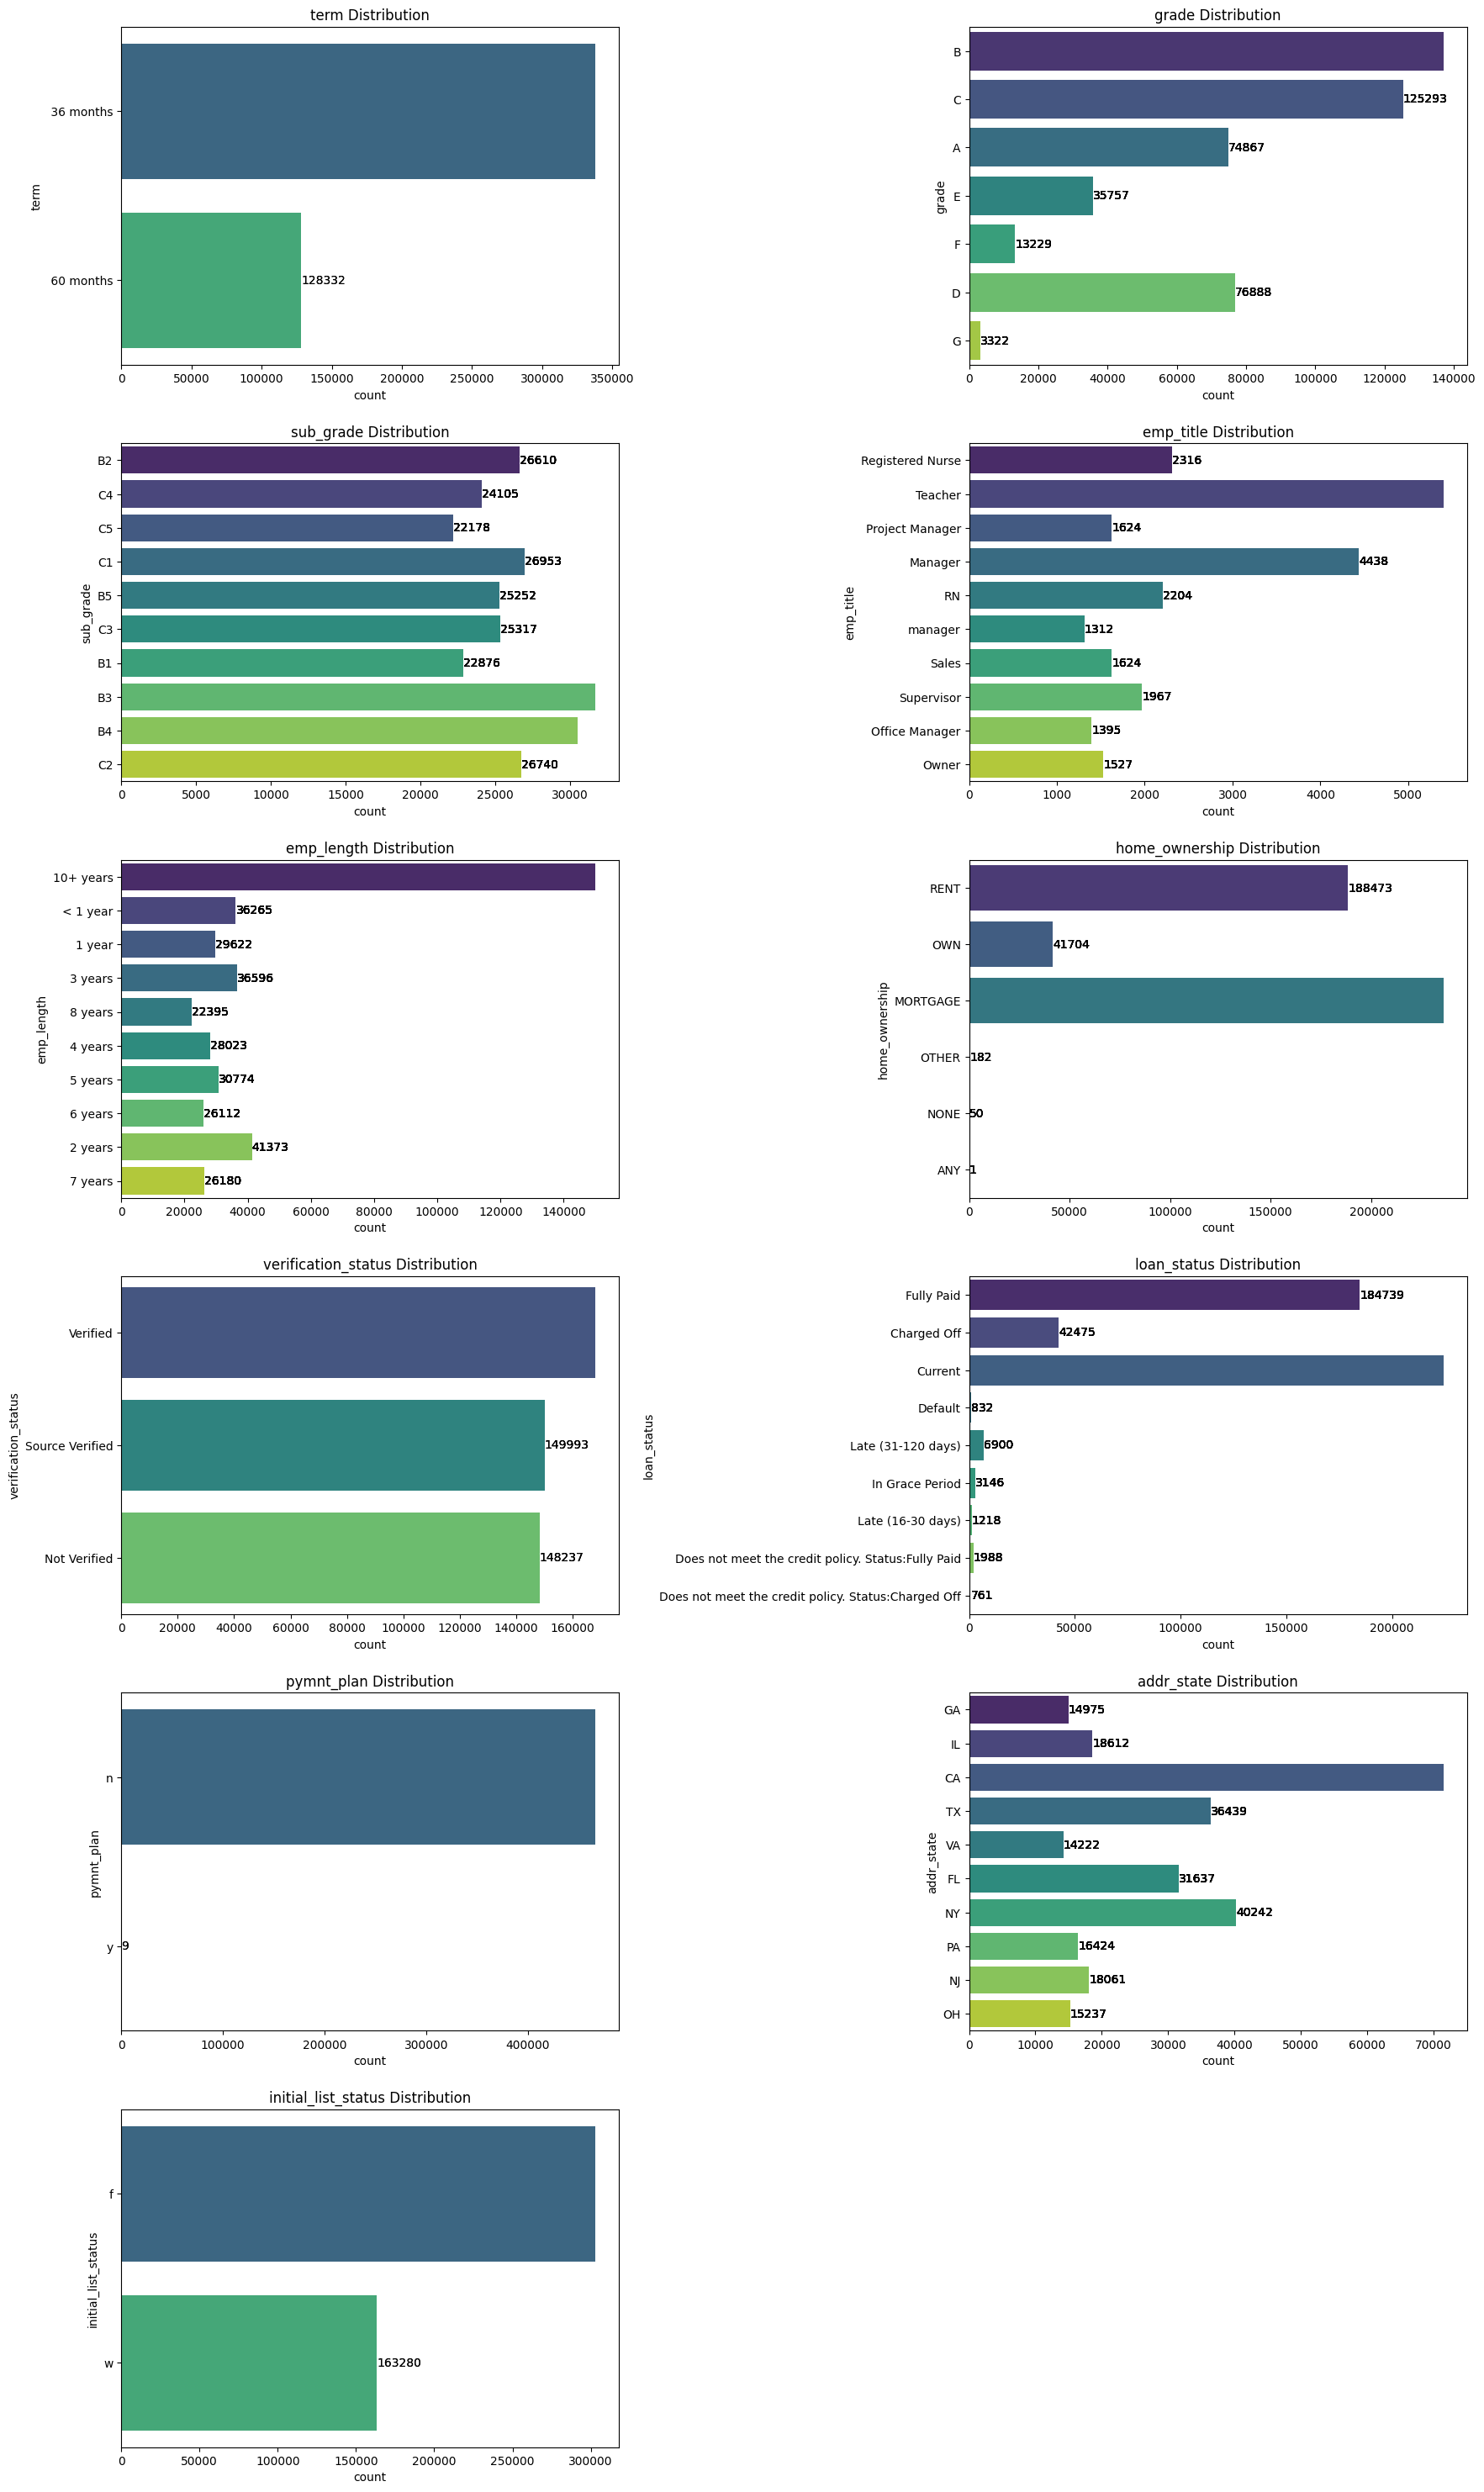

In [ ]:
# function call
cat_feat_to_plot = [col for col in cat_columns if col not in ['url', 'desc', 'purpose', 'title', 'zip_code', 'application_type']]
plot_cat_dist(df, cat_feat_to_plot)

> Visualisasi countplot digunakan untuk menganalisis distribusi beberapa kolom kategorikal. Beberapa kolom seperti `url`, `desc`, dan `title` tidak disertakan karena sifatnya yang sangat terpersonalisasi. Selain itu, kolom `application_type` juga tidak divisualisasikan karena hanya mengandung satu nilai, yaitu "INDIVIDUAL" sehingga tidak memberikan informasi yang relevan.

### **Multivariate Analysis**

> Bagian ini menampilkan beberapa visualisasi untuk menganalisis hubungan antarvariabel, berupa:
- Heatmap: menampilkan korelasi antarkolom numerik
- Pairplot: menganalisis hubungan antar beberapa variabel dengan lebih mendalam

#### **Heatmap**

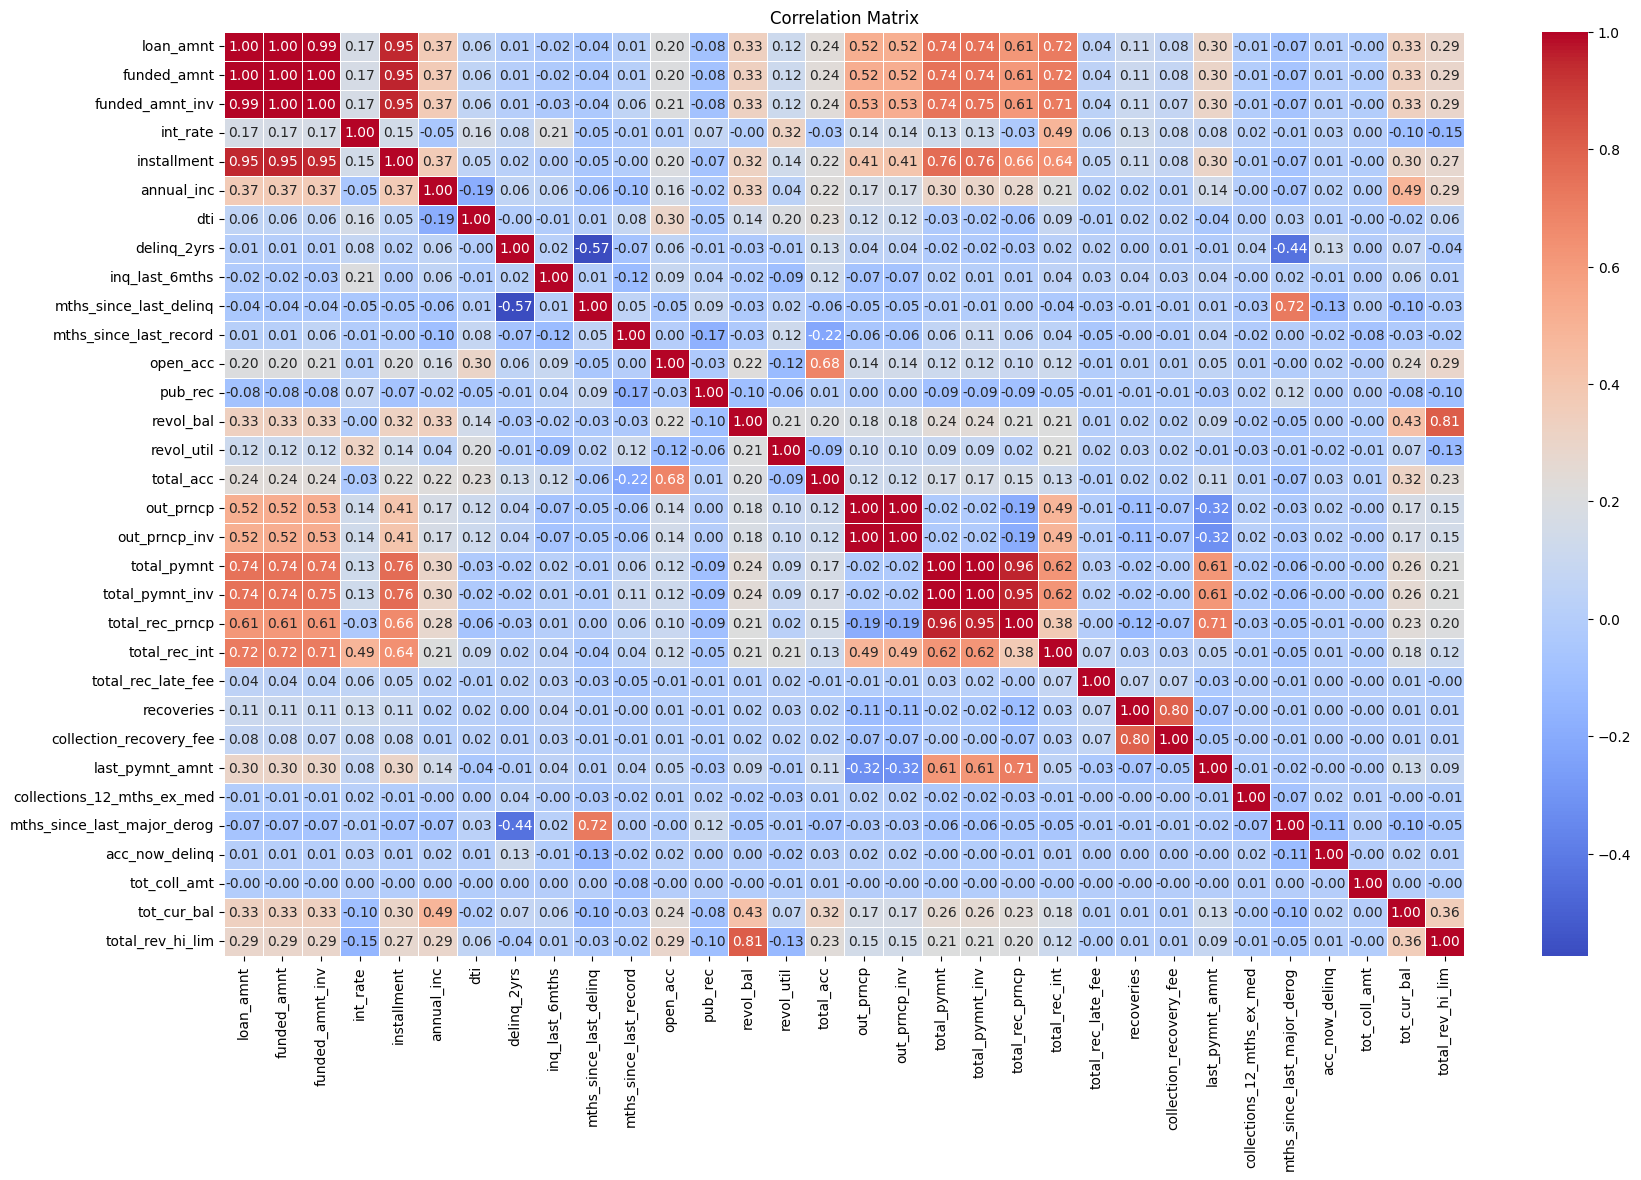

In [ ]:
# correlation heatmap
plt.figure(figsize=(20,12))

corr_matrix = df[num_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Matrix')
plt.show()

> Berdasarkan heatmap di atas, ditemukan beberapa kolom yang memiliki korelasi tinggi satu sama lain, seperti kolom `loan_amnt` dengan kolom `funded_amnt`, `funded_amnt_inv`, dan `annual_inc`. Korelasi yang terlalu tinggi antarfitur dapat menyebabkan redundansi informasi sehingga berpotensi menurunkan performa model. Oleh karena itu, kolom dengan tingkat korelasi tinggi (berdasarkan *threshold* tertentu) akan dihapus pada tahap *Feature Selection* untuk mengurangi multikolinearitas.

#### **Pairplot**

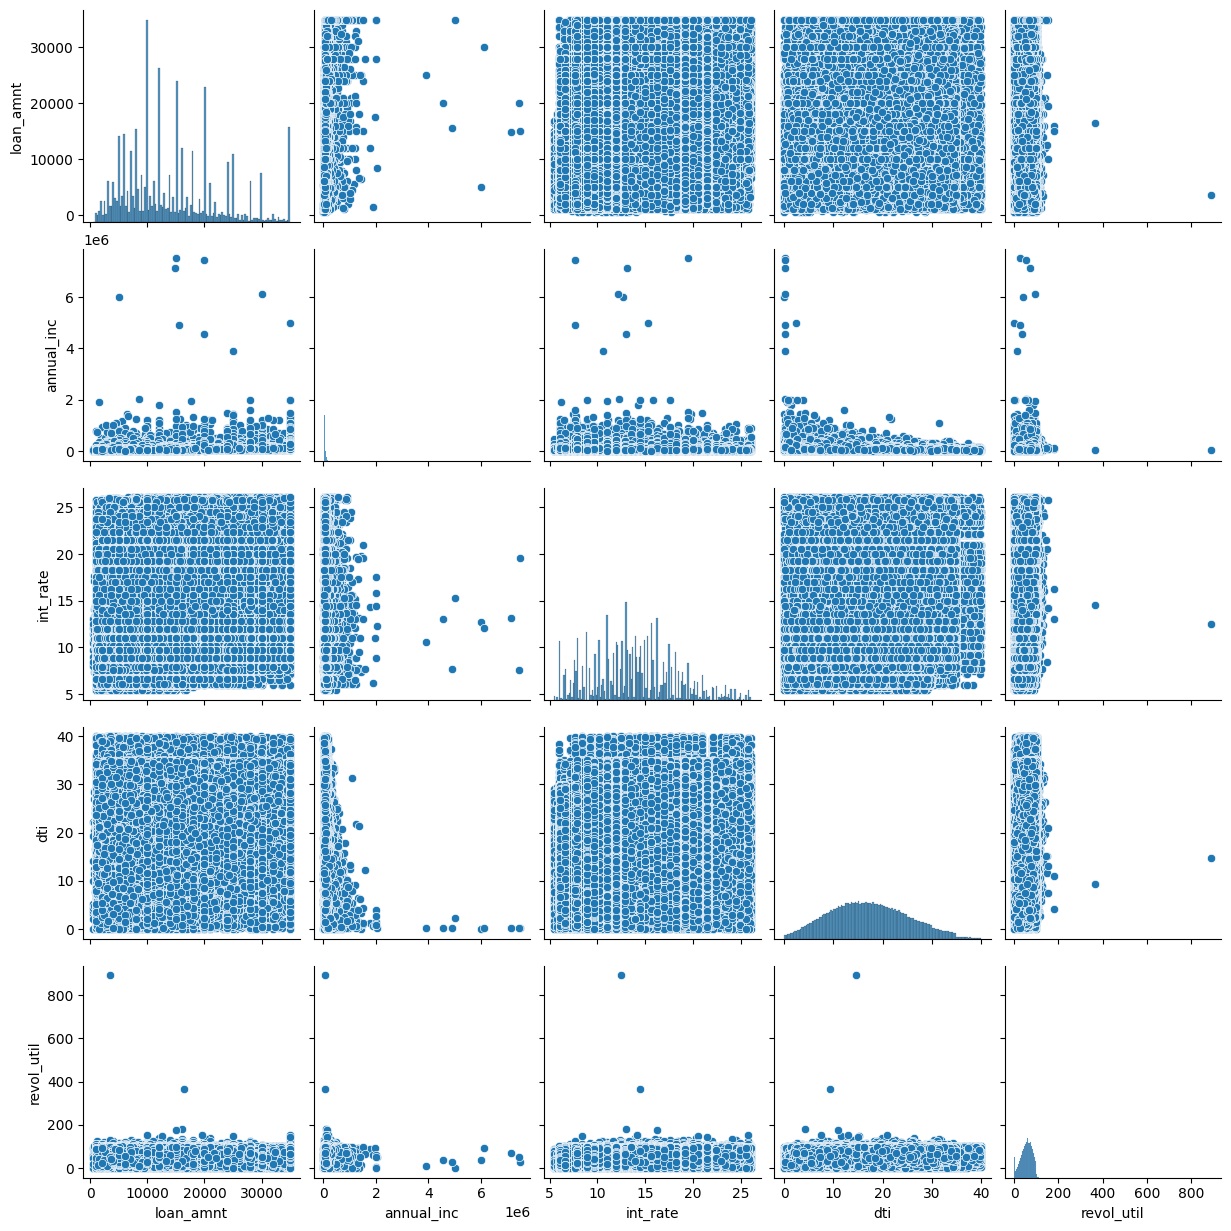

In [ ]:
# pair plot of some features
feats_to_plot = df[['loan_amnt', 'annual_inc', 'int_rate', 'dti', 'revol_util']]
sns.pairplot(feats_to_plot)

## **Data Preprocessing**

### **Missing Values**

> Terdapat dua tahapan pemeriksaan *missing values*, yaitu terhadap kolom tanpa data (*empty columns*) dan *non-empty columns*.

#### **a. Empty Columns**

In [ ]:
# display all the empty columns (no data)
mis_val = df.isna().sum()
empty_col = mis_val[mis_val == df.shape[0]]
empty_col

annual_inc_joint             466285
dti_joint                    466285
verification_status_joint    466285
open_acc_6m                  466285
open_il_6m                   466285
open_il_12m                  466285
open_il_24m                  466285
mths_since_rcnt_il           466285
total_bal_il                 466285
il_util                      466285
open_rv_12m                  466285
open_rv_24m                  466285
max_bal_bc                   466285
all_util                     466285
inq_fi                       466285
total_cu_tl                  466285
inq_last_12m                 466285
dtype: int64

> Terdapat 17 kolom kosong atau tanpa data seperti yang terlihat pada tabel di atas.

In [ ]:
# check the value of application type
df['application_type'].unique()

array(['INDIVIDUAL'], dtype=object)

> Untuk memahami alasan kolom menjadi kosong diperiksa nilai pada application_type. Terlihat bahwa kolom tersebut hanya mengandung satu nilai, yaitu 'INDIVIDUAL'. Hal ini menyebabkan kolom seperti `annual_inc_joint`, `dti_joint`, dan `verification_status_joint` kosong karena ketiga kolom tersebut khusus jika nilai `application_type` adalah co-borrower.

In [ ]:
# display the value of open_acc, installment, and revol_util for analysis
df[['open_acc', 'installment', 'revol_util']].describe()

open_acc    installment     revol_util
count  466256.000000  466285.000000  465945.000000
mean       11.187069     432.061201      56.176947
std         4.987526     243.485550      23.732628
min         0.000000      15.670000       0.000000
25%         8.000000     256.690000      39.200000
50%        10.000000     379.890000      57.600000
75%        14.000000     566.580000      74.700000
max        84.000000    1409.990000     892.300000

> Berdasarkan analisis data,
- kolom `open_acc` tidak memiliki nilai kosong dan memiliki rentang 0-84 yang berarti setiap individu dalam dataset memiliki akun yang masih digunakan, meskipun masih terdapat *missing values*. Namun,
- kolom `open_acc_6m` tidak memiliki data sama sekali yang mengindikasikan bahwa tidak ada individu dalam dataset yang membuka akun baru dalam 6 bulan terakhir.
- Hal yang sama juga ditemukan pada `open_il_6m`, `open_il_12m`, dan `open_il_24m` yang berarti tidak ada akun yang dibuka untuk tujuan pinjaman angsuran (*installment loan*) dalam 6-24 bulan terakhir atau bisa jadi tidak tercatat.
- Kolom `mths_since_rcnt_il` dan `total_bal_il` juga kosong karena kemungkinan besar tidak ada pencatatan kapan terakhir kali akun *installment loan* dibuka serta total saldo dari akun tersebut.
- Kolom `open_rv_12m` dan `open_rv_24m` juga kosong, yang berarti tidak ada akun yang dibuka untuk *revolving credit* dalam 12-24 bulan terakhir. Namun, akun tersebut tetap aktif karena kolom lain yang berkaitan dengan *revolving credit*, seperti `revol_util`, masih memiliki data.

In [ ]:
# display the value of inq_last_6mths for further analysis
df['inq_last_6mths'].sort_values().unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 24., 25., 27., 28., 31.,
       32., 33., nan])

> Kolom `inq_last_6mths` tidak kosong, tidak seperti `inq_last_12mths`. Hal ini menunjukkan bahwa pengajuan pembukaan akun banyak yang dilakukan dalam waktu 6 bulan terakhir atau bisa jadi data pembukaan akun pada 12 bulan ke belakang tidak dicatat.
> Di sisi lain, kolom `inq_fi` juga kosong yang kemungkinan besar menunjukkan bahwa tidak terdapat pengajuan akun baru untuk keperluan *personal loan* dalam periode tertentu.

In [ ]:
empty_col_names = empty_col.index # get all the empty column names
df = df.drop(columns=empty_col_names) # drop all empty columns

# re display df information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   loan_amnt                    466285 non-null  int64         
 1   funded_amnt                  466285 non-null  int64         
 2   funded_amnt_inv              466285 non-null  float64       
 3   term                         466285 non-null  object        
 4   int_rate                     466285 non-null  float64       
 5   installment                  466285 non-null  float64       
 6   grade                        466285 non-null  object        
 7   sub_grade                    466285 non-null  object        
 8   emp_title                    438697 non-null  object        
 9   emp_length                   445277 non-null  object        
 10  home_ownership               466285 non-null  object        
 11  annual_inc                

> Karena tidak mengandung informasi relevan, semua kolom kosong tersebut dihapus dari dataset.

#### **b. Non-empty columns**

In [ ]:
# function to display columns with missing values
def check_nan(df):
  count_nan = df.isna().sum().sort_values() # count and sort columns from the smallest missing values
  percentage = np.round(((count_nan / len(df)) * 100), 3) # count the percentage of null values from all data

  # create a table that displays the columns, the number of null values present, and the percentage
  mis_val_table = pd.concat([count_nan, percentage], axis=1, keys=['Null Values', 'Percentage'])

  total_nan = mis_val_table['Null Values']

  if (total_nan != 0).any(): # check if there are any missing values present
    print(mis_val_table[total_nan > 0]) # print the column with missing values
  else:
    print('No missing values present!')

# function call
check_nan(df)

                             Null Values  Percentage
annual_inc                             4       0.001
title                                 21       0.005
earliest_cr_line                      29       0.006
pub_rec                               29       0.006
delinq_2yrs                           29       0.006
acc_now_delinq                        29       0.006
inq_last_6mths                        29       0.006
open_acc                              29       0.006
total_acc                             29       0.006
last_credit_pull_d                    42       0.009
collections_12_mths_ex_med           145       0.031
revol_util                           340       0.073
last_pymnt_d                         376       0.081
emp_length                         21008       4.505
emp_title                          27588       5.917
total_rev_hi_lim                   70276      15.071
tot_cur_bal                        70276      15.071
tot_coll_amt                       70276      

> Nilai null pada kolom seperti `title`, `desc`, `emp_title`, dan `emp_length` dapat diisi dengan suatu nilai seperti 'Unknown' atau 'Not Recorded' karena nilai tersebut sangat terpersonalisasi tergantung pada peminjam.

> Sekilas terlihat terdapat **beberapa kolom yang memiliki jumlah *missing values* yang sama**. Oleh karena itu, pemeriksaan dilakukan untuk mengetahui apakah *missing values* pada kolom-kolom tersebut berada pada baris yang sama. Kolom-kolom tersebut diantaranya adalah:
- `delinq_2yrs`, `pub_rec`, `inq_last_6mths`, `open_acc`, `total_acc`, `earliest_cr_line`, dan `acc_now_delinq` sebanyak **29 baris**
- `total_rev_hi_lim`, `tot_cur_bal`, dan `tot_coll_amnt` sebanyak **70.276 baris**

In [ ]:
# select the columns that have 29 missing values
filtered_cols = df[['delinq_2yrs', 'pub_rec', 'inq_last_6mths', 'open_acc', 'total_acc', 'earliest_cr_line', 'acc_now_delinq']]

# check if the null values in each column are in the same rows
missing_rows = filtered_cols[filtered_cols.isna().all(axis=1)]
display(missing_rows)

# print the total rows with missing values
print('\nTotal rows:', len(missing_rows))

delinq_2yrs  pub_rec  inq_last_6mths  open_acc  total_acc  \
42449          NaN      NaN             NaN       NaN        NaN   
42450          NaN      NaN             NaN       NaN        NaN   
42459          NaN      NaN             NaN       NaN        NaN   
42472          NaN      NaN             NaN       NaN        NaN   
42480          NaN      NaN             NaN       NaN        NaN   
42483          NaN      NaN             NaN       NaN        NaN   
42494          NaN      NaN             NaN       NaN        NaN   
42509          NaN      NaN             NaN       NaN        NaN   
42514          NaN      NaN             NaN       NaN        NaN   
42515          NaN      NaN             NaN       NaN        NaN   
42516          NaN      NaN             NaN       NaN        NaN   
42517          NaN      NaN             NaN       NaN        NaN   
42518          NaN      NaN             NaN       NaN        NaN   
42519          NaN      NaN             NaN       NaN        NaN   
42520          NaN      NaN             NaN       NaN        NaN   
42521          NaN      NaN             NaN       NaN        NaN   
42522          NaN      NaN             NaN       NaN        NaN   
42523          NaN      NaN             NaN       NaN        NaN   
42524          NaN      NaN             NaN       NaN        NaN   
42525          NaN      NaN             NaN       NaN        NaN   
42526          NaN      NaN             NaN       NaN        NaN   
42527          NaN      NaN             NaN       NaN        NaN   
42528          NaN      NaN             NaN       NaN        NaN   
42529          NaN      NaN             NaN       NaN        NaN   
42530          NaN      NaN             NaN       NaN        NaN   
42531          NaN      NaN             NaN       NaN        NaN   
42532          NaN      NaN             NaN       NaN        NaN   
42533          NaN      NaN             NaN       NaN        NaN   
42534          NaN      NaN             NaN       NaN        NaN   

      earliest_cr_line  acc_now_delinq  
42449              NaT             NaN  
42450              NaT             NaN  
42459              NaT             NaN  
42472              NaT             NaN  
42480              NaT             NaN  
42483              NaT             NaN  
42494              NaT             NaN  
42509              NaT             NaN  
42514              NaT             NaN  
42515              NaT             NaN  
42516              NaT             NaN  
42517              NaT             NaN  
42518              NaT             NaN  
42519              NaT             NaN  
42520              NaT             NaN  
42521              NaT             NaN  
42522              NaT             NaN  
42523              NaT             NaN  
42524              NaT             NaN  
42525              NaT             NaN  
42526              NaT             NaN  
42527              NaT             NaN  
42528              NaT             NaN  
42529              NaT             NaN  
42530              NaT             NaN  
42531              NaT             NaN  
42532              NaT             NaN  
42533              NaT             NaN  
42534              NaT             NaN


Total rows: 29


> Setelah diperiksa, ternyata semua *missing values* berada pada baris yang sama. Hal ini dapat terjadi karena terdapat informasi yang tidak terekam. Untuk itu, baris ini dapat dihapus karena hanya mencakup sekitar 0.006% dari total data.

In [ ]:
# drop the missing rows from the filtered columns above
df = df.dropna(subset=filtered_cols.columns)

# recheck the missing values information
check_nan(df)

                             Null Values  Percentage
title                                 21       0.005
last_credit_pull_d                    41       0.009
collections_12_mths_ex_med           116       0.025
revol_util                           311       0.067
last_pymnt_d                         376       0.081
emp_length                         21008       4.506
emp_title                          27576       5.914
total_rev_hi_lim                   70247      15.066
tot_cur_bal                        70247      15.066
tot_coll_amt                       70247      15.066
next_pymnt_d                      227214      48.732
mths_since_last_delinq            250322      53.688
desc                              340303      72.986
mths_since_last_major_derog       367282      78.773
mths_since_last_record            403618      86.566


> Langkah selanjutnya adalah memeriksa kemungkinan terjadi *missing values* pada kolom `mths_since_last_delinq`, `mths_since_last_major_derog`, dan `mths_since_last_record`. Ketiga kolom ini bisa jadi berkaitan dengan kolom lainnya seperti `delinq_2yrs` dan `pub_rec`.

In [ ]:
# check the null rows in mths_since_last_delinq where the value of delinq_2yrs are not 0
df.loc[(df['mths_since_last_delinq'].isna()) & (df['delinq_2yrs'] != 0.0), ['mths_since_last_delinq', 'delinq_2yrs']]

mths_since_last_delinq  delinq_2yrs
43607                      NaN          1.0
44894                      NaN          1.0
44932                      NaN          3.0
45181                      NaN          1.0
45305                      NaN          1.0
...                        ...          ...
456945                     NaN          1.0
457114                     NaN          1.0
458750                     NaN          1.0
458796                     NaN          1.0
466189                     NaN          1.0

[496 rows x 2 columns]

> Pada kolom `mths_since_last_delinq`, saya memeriksa informasi dari kolom `delinq_2yrs`, dengan nilai selain 0, yang berarti peminjam pernah tercatat  *delinquency*. Ternyata terdapat 496 baris yang tidak tercatat, sedangkan sisanya (`delinq_2yrs` = 0) berarti peminjam dapat diasumsikan tidak pernah tercatat pinjamannya sebagai *delinquency*. Dengan begitu, untuk `delinq_2yrs` = 0, kolom `mths_since_last_delinq` dapat diisi dengan 0.

In [ ]:
# check the null rows in mths_since_last_record where the value of pub_rec are 0
df.loc[(df['mths_since_last_record'].isna()) & (df['pub_rec'] == 0), ['mths_since_last_record', 'pub_rec']]

mths_since_last_record  pub_rec
0                          NaN      0.0
1                          NaN      0.0
2                          NaN      0.0
3                          NaN      0.0
4                          NaN      0.0
...                        ...      ...
466279                     NaN      0.0
466280                     NaN      0.0
466282                     NaN      0.0
466283                     NaN      0.0
466284                     NaN      0.0

[403618 rows x 2 columns]

> Setelah diperiksa, ternyata semua kolom pada `mths_since_last_record` terjadi ketika nilai `pub_rec` = 0. Dengan begitu, semua *missing values* dapat di-*impute* dengan nilai 0.

In [ ]:
# check the null rows in mths_since_last_major_derog where the value of pub_rec and delinq_2yrs are 0
df.loc[(df['mths_since_last_major_derog'].isna()) & (df['pub_rec'] == 0) & (df['delinq_2yrs'] == 0) ,
 ['mths_since_last_major_derog', 'pub_rec', 'delinq_2yrs']]

mths_since_last_major_derog  pub_rec  delinq_2yrs
0                               NaN      0.0          0.0
1                               NaN      0.0          0.0
2                               NaN      0.0          0.0
3                               NaN      0.0          0.0
4                               NaN      0.0          0.0
...                             ...      ...          ...
466270                          NaN      0.0          0.0
466272                          NaN      0.0          0.0
466279                          NaN      0.0          0.0
466280                          NaN      0.0          0.0
466282                          NaN      0.0          0.0

[282523 rows x 3 columns]

In [ ]:
# check the null rows in mths_since_last_major_derog where the value of pub_rec != 0 and delinq_2yrs = 0
df.loc[(df['mths_since_last_major_derog'].isna()) & (df['pub_rec'] != 0) & (df['delinq_2yrs'] == 0) ,
 ['mths_since_last_major_derog', 'pub_rec', 'delinq_2yrs']]

mths_since_last_major_derog  pub_rec  delinq_2yrs
66                              NaN      1.0          0.0
70                              NaN      1.0          0.0
77                              NaN      1.0          0.0
94                              NaN      1.0          0.0
253                             NaN      1.0          0.0
...                             ...      ...          ...
466245                          NaN      1.0          0.0
466259                          NaN      1.0          0.0
466273                          NaN      1.0          0.0
466275                          NaN      1.0          0.0
466281                          NaN      1.0          0.0

[37965 rows x 3 columns]

In [ ]:
# check the null rows in mths_since_last_major_derog where the value of pub_rec and delinq_2yrs != 0
df.loc[(df['mths_since_last_major_derog'].isna()) & (df['pub_rec'] != 0) & (df['delinq_2yrs'] != 0) ,
 ['mths_since_last_major_derog', 'pub_rec', 'delinq_2yrs']]

mths_since_last_major_derog  pub_rec  delinq_2yrs
161                             NaN      1.0          1.0
359                             NaN      1.0          1.0
382                             NaN      1.0          1.0
2245                            NaN      1.0          1.0
2371                            NaN      1.0          1.0
...                             ...      ...          ...
466004                          NaN      1.0          1.0
466070                          NaN      2.0          1.0
466090                          NaN      1.0          1.0
466155                          NaN      1.0          1.0
466214                          NaN      1.0          1.0

[4592 rows x 3 columns]

> Sama seperti penjelasan pada kolom sebelumnya, *missing values* pada kolom `mths_since_last_major_derog` dimana `pub_rec` dan `delinq_2yrs` = 0 dapat diisi dengan 0, sedangkan sisanya karena tidak diketahui diisi dengan nilai lainnya seperti -1.

In [ ]:
# impute with 0

## 1. the missing values in mths_since_last_delinq for delinq_2yrs = 0
df.loc[(df['mths_since_last_delinq'].isna()) & (df['delinq_2yrs'] == 0.0), 'mths_since_last_delinq'] = 0

## 2. the missing values in mths_since_last_record for pub_rec = 0
df.loc[(df['mths_since_last_record'].isna()) & (df['pub_rec'] == 0.0), 'mths_since_last_record'] = 0

## 3. the missing values in mths_since_last_major_derog for pub_rec = 0 & delinq_2yrs = 0
df.loc[(df['mths_since_last_major_derog'].isna()) & (df['pub_rec'] == 0.0) & (df['delinq_2yrs'] == 0.0), 'mths_since_last_major_derog'] = 0

In [ ]:
# impute with -1 for the unknown data
df[['mths_since_last_delinq', 'mths_since_last_major_derog']] = df[['mths_since_last_delinq', 'mths_since_last_major_derog']].fillna(-1)

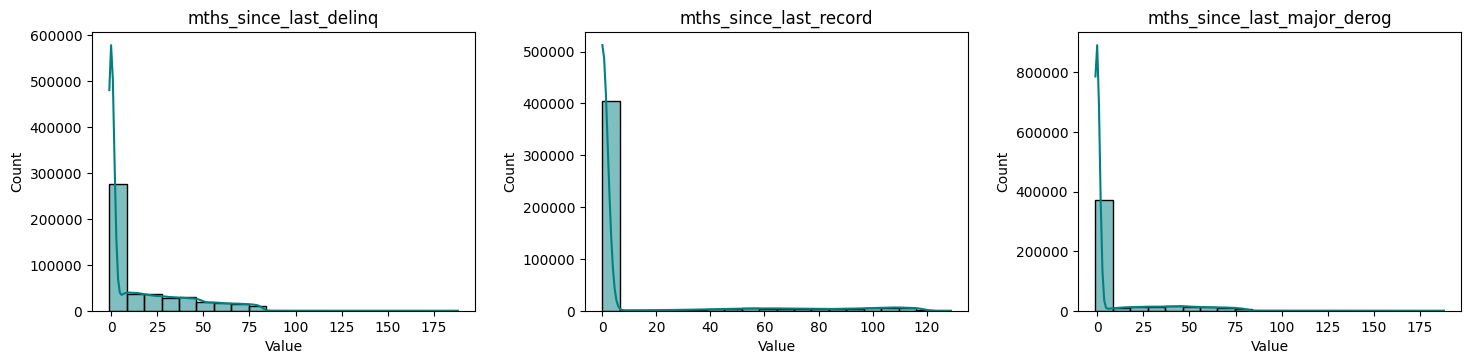

In [ ]:
# plot the histogram after missing values handling
plot_histogram(df, ['mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog'])

In [ ]:
# recheck the missing values
check_nan(df)

                            Null Values  Percentage
title                                21       0.005
last_credit_pull_d                   41       0.009
collections_12_mths_ex_med          116       0.025
revol_util                          311       0.067
last_pymnt_d                        376       0.081
emp_length                        21008       4.506
emp_title                         27576       5.914
total_rev_hi_lim                  70247      15.066
tot_coll_amt                      70247      15.066
tot_cur_bal                       70247      15.066
next_pymnt_d                     227214      48.732
desc                             340303      72.986


> Beberapa kolom selanjutnya yang dapat diperiksa adalah kolom dengan tipe datetime seperti `last_pymnt_d`, `next_pymnt_d`, dan `last_credit_pull_d`.

In [ ]:
# check the null rows in last_pymnt_d with the information of other columns
df.loc[(df['last_pymnt_d'].isna()), ['last_pymnt_d', 'loan_status', 'last_pymnt_amnt', 'total_pymnt']]

last_pymnt_d  loan_status  last_pymnt_amnt  total_pymnt
26              NaT  Charged Off              0.0         0.00
2731            NaT  Charged Off              0.0         0.00
3625            NaT  Charged Off              0.0       366.75
3998            NaT  Charged Off              0.0         0.00
4220            NaT  Charged Off              0.0      1800.00
...             ...          ...              ...          ...
455499          NaT  Charged Off              0.0       957.97
458391          NaT  Charged Off              0.0      1144.13
459366          NaT  Charged Off              0.0         0.00
464853          NaT  Charged Off              0.0      1991.37
465510          NaT  Charged Off              0.0      4278.15

[376 rows x 4 columns]

In [ ]:
# check the unique values of loan_status where last_pymnt_d is null
df.loc[df['last_pymnt_d'].isna(), 'loan_status'].unique()

array(['Charged Off',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

> Setelah diperiksa, ternyata semua baris null pada `last_pymnt_d` terjadi pada peminjam dengan nilai `loan_status` '**Charged Off**'. Hal ini masuk akal karena ketika sudah dinyatakan *charged off*, berarti sudah dianggap sebagai kerugian. Dapat dilihat juga nilai `last_pymnt_amnt` semuanya adalah 0. Dengan demikian, nilai null tersebut dapat diisi dengan nilai seperti 'Not Recorded'.

In [ ]:
# check the null rows in last_credit_pull_d with the information of other columns
df.loc[(df['last_credit_pull_d'].isna()), ['last_credit_pull_d', 'issue_d', 'last_pymnt_d', 'loan_status']]

last_credit_pull_d    issue_d last_pymnt_d  \
26094                 NaT 2010-09-01   2012-06-01   
39545                 NaT 2007-12-01   2010-08-01   
42482                 NaT 2007-07-01   2008-09-01   
65583                 NaT 2013-11-01   2015-09-01   
67604                 NaT 2013-11-01   2014-08-01   
67775                 NaT 2013-11-01   2015-02-01   
68251                 NaT 2013-11-01   2015-09-01   
70447                 NaT 2013-11-01   2016-01-01   
70508                 NaT 2013-11-01   2016-01-01   
70530                 NaT 2013-11-01   2015-12-01   
71322                 NaT 2013-11-01   2016-01-01   
71468                 NaT 2013-11-01   2014-12-01   
80405                 NaT 2013-10-01   2016-01-01   
80946                 NaT 2013-10-01   2015-03-01   
246515                NaT 2014-11-01   2015-12-01   
256927                NaT 2014-11-01   2015-08-01   
257029                NaT 2014-11-01   2015-07-01   
261290                NaT 2014-11-01   2016-01-01   
262988                NaT 2014-11-01   2016-01-01   
268759                NaT 2014-11-01   2016-01-01   
284353                NaT 2014-10-01   2016-01-01   
285996                NaT 2014-10-01   2015-05-01   
291037                NaT 2014-10-01   2016-01-01   
292355                NaT 2014-10-01   2016-01-01   
295829                NaT 2014-10-01   2016-01-01   
296526                NaT 2014-10-01   2016-01-01   
298669                NaT 2014-10-01   2016-01-01   
299137                NaT 2014-10-01   2016-01-01   
300940                NaT 2014-10-01   2016-01-01   
305120                NaT 2014-09-01   2015-04-01   
353477                NaT 2014-07-01   2016-01-01   
359337                NaT 2014-07-01   2015-07-01   
372977                NaT 2014-06-01   2016-01-01   
374015                NaT 2014-06-01   2016-01-01   
374936                NaT 2014-06-01   2015-06-01   
404493                NaT 2014-04-01   2016-01-01   
411479                NaT 2014-04-01   2015-04-01   
429518                NaT 2014-03-01   2015-07-01   
432743                NaT 2014-03-01   2015-04-01   
444928                NaT 2014-02-01   2015-03-01   
460654                NaT 2014-01-01   2016-01-01   

                                              loan_status  
26094                                         Charged Off  
39545                                          Fully Paid  
42482   Does not meet the credit policy. Status:Fully ...  
65583                                          Fully Paid  
67604                                          Fully Paid  
67775                                         Charged Off  
68251                                          Fully Paid  
70447                                             Current  
70508                                             Current  
70530                                          Fully Paid  
71322                                          Fully Paid  
71468                                          Fully Paid  
80405                                             Current  
80946                                          Fully Paid  
246515                                            Current  
256927                                         Fully Paid  
257029                                        Charged Off  
261290                                            Current  
262988                                            Current  
268759                                            Current  
284353                                            Current  
285996                                         Fully Paid  
291037                                            Current  
292355                                            Current  
295829                                            Current  
296526                                            Current  
298669                                            Current  
299137                                            Current  
300940                                  

In [ ]:
# check the unique values of loan_status where last_credit_pull_d is null
df.loc[df['last_credit_pull_d'].isna(), 'loan_status'].value_counts()

loan_status
Current                                               19
Fully Paid                                            15
Charged Off                                            6
Does not meet the credit policy. Status:Fully Paid     1
Name: count, dtype: int64

> Karena tidak ditemukan pola terhadap nilai null pada `last_credit_pull_d`, diasumsikan nilai tersebut terjadi karena tidak terekam.

In [ ]:
# check the unique values of loan_status where next_pymnt_d is null
df.loc[(df['next_pymnt_d'].isna()), 'loan_status'].value_counts()

loan_status
Fully Paid     184739
Charged Off     42475
Name: count, dtype: int64

> Setelah diperiksa, ternyata semua baris null pada `next_pymnt_d` merujuk pada peminjam dengan `loan_status` '**Fully Paid**' atau '**Charged Off**'. Hal ini juga masuk akal, karena peminjam dengan status 'Fully Paid' berarti pinjamannya sudah lunas, sedangkan untuk 'Charged Off' sudah dianggap sebagai sebuah *loss*.

In [ ]:
# impute with 'Not Recorded'
def replace_with_value(df, col_list):
  for col in col_list:
    # convert datetime type to string before imputing
    if df[col].dtype == 'datetime64[ns]':
      df[col] = df[col].astype(str).replace('NaT', 'Not Recorded')

    # fill missing values
    if col == 'next_pymnt_d':
      df[col] = df[col].replace('Not Recorded', 'Loan Closed') # specifically change the value to indicate no more bills
    else:
      df[col] = df[col].fillna('Not Recorded')
  return df

# function call
cat_cols_to_impute = ['title', 'desc', 'emp_title', 'emp_length', 'last_pymnt_d', 'last_credit_pull_d', 'next_pymnt_d']
replace_with_value(df, cat_cols_to_impute)

# recheck null values
check_nan(df)

                            Null Values  Percentage
collections_12_mths_ex_med          116       0.025
revol_util                          311       0.067
tot_coll_amt                      70247      15.066
tot_cur_bal                       70247      15.066
total_rev_hi_lim                  70247      15.066


> Fungsi di atas melakukan imputasi terhadap beberapa kolom yang sudah diperiksa kemungkinan penyebab nilai null pada datanya karena tidak terekam dengan nilai '**Not Recorded**' atau '**Loan Closed**' khusus kolom `next_pymnt_d`.

In [ ]:
# filter the columns that have the same amount of missing data (70.247 data)
filtered_data = df[['tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']]

# check if the null values in each column are in the same rows
missing_data = filtered_data[filtered_data.isna().all(axis=1)]
display(missing_data)

# print the total rows with missing values
print(f'\nTotal data: {len(missing_data)}')

tot_coll_amt  tot_cur_bal  total_rev_hi_lim
0                NaN          NaN               NaN
1                NaN          NaN               NaN
2                NaN          NaN               NaN
3                NaN          NaN               NaN
4                NaN          NaN               NaN
...              ...          ...               ...
230652           NaN          NaN               NaN
230653           NaN          NaN               NaN
230654           NaN          NaN               NaN
230655           NaN          NaN               NaN
230656           NaN          NaN               NaN

[70247 rows x 3 columns]


Total data: 70247


> Setelah diperiksa, ternyata semua nilai null berada pada baris yang sama.

In [ ]:
# check the possible cause of null values in collections_12_mths_ex_med using tot_coll_amt
df.loc[(df['collections_12_mths_ex_med'].isna()), ['collections_12_mths_ex_med', 'tot_coll_amt']]

collections_12_mths_ex_med  tot_coll_amt
39698                         NaN           NaN
39711                         NaN           NaN
39719                         NaN           NaN
39728                         NaN           NaN
39729                         NaN           NaN
...                           ...           ...
42508                         NaN           NaN
42510                         NaN           NaN
42511                         NaN           NaN
42512                         NaN           NaN
42513                         NaN           NaN

[116 rows x 2 columns]

> Setelah diperiksa, semua baris null pada kolom collections_12_mths_ex_med juga kosong di baris tot_coll_amt. Hal ini mengindikasikan nilai tersebut tidak terekam. Karena persentase data yang termasuk sedikit (0.025%), baris null ini dihapus.

In [ ]:
# drop the missing values
df = df.dropna(subset='collections_12_mths_ex_med')

In [ ]:
# recheck missing values
check_nan(df)

                  Null Values  Percentage
revol_util                308       0.066
tot_coll_amt            70131      15.045
tot_cur_bal             70131      15.045
total_rev_hi_lim        70131      15.045


In [ ]:
# check the correlation among 'tot_coll_amt', 'collections_12_mths_ex_med', 'recoveries', 'collection_recovery_fee'
df[['tot_coll_amt', 'collections_12_mths_ex_med', 'recoveries', 'collection_recovery_fee']].corr()

tot_coll_amt  collections_12_mths_ex_med  \
tot_coll_amt                    1.000000                    0.006721   
collections_12_mths_ex_med      0.006721                    1.000000   
recoveries                     -0.000625                   -0.001023   
collection_recovery_fee        -0.000309                   -0.000369   

                            recoveries  collection_recovery_fee  
tot_coll_amt                 -0.000625                -0.000309  
collections_12_mths_ex_med   -0.001023                -0.000369  
recoveries                    1.000000                 0.800703  
collection_recovery_fee       0.800703                 1.000000

In [ ]:
# check the skewness
df['tot_coll_amt'].skew()

np.float64(618.2730112229908)

In [ ]:
# check the non null rows for tot_coll_amt and recoveries > 0 to see if there's any pattern
df.loc[(df['tot_coll_amt'].notna()) & (df['recoveries'] > 0), ['tot_coll_amt', 'collections_12_mths_ex_med', 'recoveries', 'collection_recovery_fee']]

tot_coll_amt  collections_12_mths_ex_med  recoveries  \
42719            0.0                         0.0     2760.67   
42741            0.0                         0.0     2519.14   
42782            0.0                         0.0      620.96   
42822            0.0                         0.0     1960.50   
42858            0.0                         0.0     3247.09   
...              ...                         ...         ...   
466193           0.0                         0.0     1147.16   
466209           0.0                         0.0     1519.00   
466214           0.0                         0.0     4470.43   
466252           0.0                         0.0      682.95   
466276           0.0                         0.0     1159.40   

        collection_recovery_fee  
42719                   27.6067  
42741                  453.4452  
42782                  111.7728  
42822                   19.6050  
42858                  584.4762  
...                         ...  
466193                  11.4716  
466209                 273.4200  
466214                  44.7043  
466252                   6.8295  
466276                  11.5940  

[16310 rows x 4 columns]

> Setelah dianalisis, tidak ditemukan pola penyebab `tot_coll_amt` memiliki baris null. Ketika diperiksa untuk nilai `recoveries` > 0 juga ternyata tidak berhubungan dengan kolom tersebut. Dengan demikian, diasumsi tidak ada *collection* sehingga nilai diimputasi dengan 0.

In [ ]:
# impute with 0:
df['tot_coll_amt'] = df['tot_coll_amt'].fillna(0)

In [ ]:
# check the null rows in tot_cur_bal with the information of other columns
df.loc[df['tot_cur_bal'].notna(), ['tot_cur_bal', 'total_pymnt', 'loan_amnt', 'revol_bal', 'out_prncp', 'installment', 'total_rec_int', 'total_rec_prncp', 'open_acc', 'total_acc']]

tot_cur_bal   total_pymnt  loan_amnt  revol_bal  out_prncp  \
42535      114834.0  21251.040000      27050      36638   10018.90   
42536       14123.0   7994.830000       9750       7967    3710.96   
42537      267646.0   8842.800000      12000      13168    4266.62   
42538       13605.0  13359.770000      12000       5572       0.00   
42539      272492.0  11431.200000      15000      11431    5449.27   
...             ...           ...        ...        ...        ...   
466280     294998.0  10383.360000      18400      23208   12574.00   
466281     221830.0   4677.920000      22000      18238       0.00   
466282      73598.0  12343.980000      20700       6688   14428.31   
466283     591610.0   2126.579838       2000      11404       0.00   
466284      57477.0   8821.620000      10000      11325    3984.38   

        installment  total_rec_int  total_rec_prncp  open_acc  total_acc  
42535        885.46        4219.94         17031.10      14.0       27.0  
42536        333.14        1955.79          6039.04      12.0       28.0  
42537        368.45        1109.42          7733.38      12.0       22.0  
42538        407.40        1359.78         11999.99       7.0       32.0  
42539        476.30        1880.47          9550.73       8.0       29.0  
...             ...            ...              ...       ...        ...  
466280       432.64        4557.36          5826.00      18.0       36.0  
466281       582.50        2840.88          1837.04      18.0       30.0  
466282       514.34        6072.29          6271.69      18.0       43.0  
466283        62.59         126.58          2000.00      21.0       27.0  
466284       367.58        2806.00          6015.62       6.0       22.0  

[396009 rows x 10 columns]

In [ ]:
# check the correlation between these columns
df[['tot_cur_bal', 'total_pymnt', 'loan_amnt', 'revol_bal', 'installment', 'total_rec_prncp', 'open_acc', 'total_acc', 'total_rev_hi_lim']].corr()

tot_cur_bal  total_pymnt  loan_amnt  revol_bal  installment  \
tot_cur_bal          1.000000     0.257000   0.332686   0.426826     0.300639   
total_pymnt          0.257000     1.000000   0.743794   0.242255     0.764312   
loan_amnt            0.332686     0.743794   1.000000   0.331503     0.949652   
revol_bal            0.426826     0.242255   0.331503   1.000000     0.320347   
installment          0.300639     0.764312   0.949652   0.320347     1.000000   
total_rec_prncp      0.234614     0.956653   0.612717   0.209980     0.663345   
open_acc             0.243536     0.120147   0.204120   0.222797     0.196793   
total_acc            0.317500     0.168604   0.235167   0.198548     0.215819   
total_rev_hi_lim     0.356388     0.211101   0.290208   0.809930     0.270074   

                  total_rec_prncp  open_acc  total_acc  total_rev_hi_lim  
tot_cur_bal              0.234614  0.243536   0.317500          0.356388  
total_pymnt              0.956653  0.120147   0.168604          0.211101  
loan_amnt                0.612717  0.204120   0.235167          0.290208  
revol_bal                0.209980  0.222797   0.198548          0.809930  
installment              0.663345  0.196793   0.215819          0.270074  
total_rec_prncp          1.000000  0.097174   0.152153          0.201842  
open_acc                 0.097174  1.000000   0.682061          0.290747  
total_acc                0.152153  0.682061   1.000000          0.232194  
total_rev_hi_lim         0.201842  0.290747   0.232194          1.000000

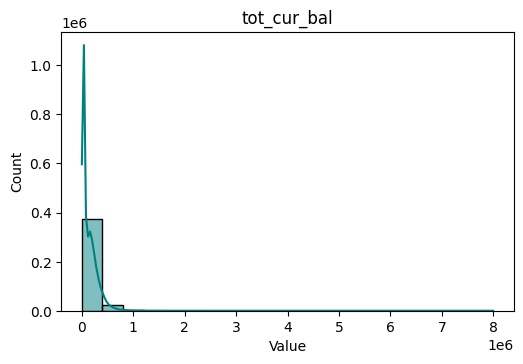

In [ ]:
# plot the histogram of tot_cur_bal
plot_histogram(df, ['tot_cur_bal'])

In [ ]:
# check if there is any pattern if tot_cur_bal = 0
df.loc[df['tot_cur_bal'] == 0,
 ['tot_cur_bal', 'total_rev_hi_lim', 'annual_inc', 'earliest_cr_line', 'delinq_2yrs', 'loan_status']]

tot_cur_bal  total_rev_hi_lim  annual_inc earliest_cr_line  \
47870           0.0            2000.0    107000.0       2000-09-01   
55321           0.0            8200.0     50000.0       2004-11-01   
62720           0.0            1800.0     25000.0       2008-07-01   
63377           0.0             600.0     20400.0       2006-04-01   
63531           0.0               0.0     38500.0       1998-08-01   
...             ...               ...         ...              ...   
454916          0.0            8300.0     65000.0       2006-11-01   
460595          0.0            7500.0     80000.0       2000-03-01   
462462          0.0            3600.0     55000.0       1999-11-01   
463465          0.0             300.0     34356.0       1995-11-01   
464774          0.0               0.0    120000.0       2008-07-01   

        delinq_2yrs  loan_status  
47870           0.0      Current  
55321           0.0   Fully Paid  
62720           0.0  Charged Off  
63377           0.0      Current  
63531           0.0   Fully Paid  
...             ...          ...  
454916          0.0   Fully Paid  
460595          0.0   Fully Paid  
462462          0.0      Current  
463465          0.0      Current  
464774          0.0   Fully Paid  

[78 rows x 6 columns]

In [ ]:
# check the median of the column
df['tot_cur_bal'].median()

81539.0

In [ ]:
# check the skewness of the column
df['tot_cur_bal'].skew()

np.float64(3.047906077706473)

> Karena tidak ditemukan pola untuk bisa memanfaatkan informasi dari kolom lain. Setelah diperiksa median dari kolom `tot_cur_bal` dan nilai skewness nya, untuk nilai null pada kolom ini diisi dengan nilai mediannya.

In [ ]:
# impute with median
cur_bal_median = df['tot_cur_bal'].median()
df['tot_cur_bal'] = df['tot_cur_bal'].fillna(cur_bal_median)

In [ ]:
# check the null rows in total_rev_hi_lim with the information of other columns
df.loc[df['total_rev_hi_lim'].notna(), ['total_rev_hi_lim', 'revol_bal', 'revol_util']]

total_rev_hi_lim  revol_bal  revol_util
42535            59900.0      36638        61.2
42536            15100.0       7967        52.8
42537            61100.0      13168        21.6
42538             8100.0       5572        68.8
42539            15400.0      11431        74.2
...                  ...        ...         ...
466280           29900.0      23208        77.6
466281           39400.0      18238        46.3
466282           13100.0       6688        51.1
466283           53100.0      11404        21.5
466284           16000.0      11325        70.8

[396009 rows x 3 columns]

In [ ]:
# check the correlation between these columns
df[['total_rev_hi_lim', 'revol_bal', 'revol_util']].corr()

total_rev_hi_lim  revol_bal  revol_util
total_rev_hi_lim          1.000000   0.809930   -0.125469
revol_bal                 0.809930   1.000000    0.206663
revol_util               -0.125469   0.206663    1.000000

In [ ]:
df['rev_lim_bal_ratio'] = df['total_rev_hi_lim'] / df['revol_bal']
median_ratio = df['rev_lim_bal_ratio'].median()
print(f'The median ratio of total revolving credit limit to revolving balance: {median_ratio}')

# impute total_rev_hi_lim with the median ratio
df.loc[df['total_rev_hi_lim'].isna(), 'total_rev_hi_lim'] = df['revol_bal'] * median_ratio

df = df.drop('rev_lim_bal_ratio', axis=1)

The median ratio of total revolving credit limit to revolving balance: 1.716936098451458


> Setelah diperiksa, kolom `total_rev_hi_lim` memiliki korelasi yang kuat dengan `revol_bal` sehingga dapat diimputasi dengan median dari ratio keduanya dibanding dengan median dari kolom itu sendiri.

In [ ]:
# recheck missing values
check_nan(df)

            Null Values  Percentage
revol_util          308       0.066


In [ ]:
# check the correlation between these columns
df[['revol_util', 'revol_bal', 'dti', 'int_rate', 'total_rec_int']].corr()

revol_util  revol_bal       dti  int_rate  total_rec_int
revol_util       1.000000   0.206663  0.200338  0.323271       0.209634
revol_bal        0.206663   1.000000  0.143394 -0.004635       0.207024
dti              0.200338   0.143394  1.000000  0.159461       0.089386
int_rate         0.323271  -0.004635  0.159461  1.000000       0.485094
total_rec_int    0.209634   0.207024  0.089386  0.485094       1.000000

In [ ]:
# check the null rows in revol_util where the value of revol_bal = 0
df.loc[(df['revol_util'].isna()) & (df['revol_bal'] == 0), ['revol_util', 'revol_bal', 'total_rev_hi_lim']]

revol_util  revol_bal  total_rev_hi_lim
3577           NaN          0               0.0
4730           NaN          0               0.0
4960           NaN          0               0.0
11315          NaN          0               0.0
12076          NaN          0               0.0
...            ...        ...               ...
449512         NaN          0               0.0
451515         NaN          0               0.0
459356         NaN          0               0.0
464273         NaN          0               0.0
464774         NaN          0               0.0

[242 rows x 3 columns]

In [ ]:
rev_util_formula = (df['revol_bal'] / df['total_rev_hi_lim']) * 100 # revol util formula

# impute using formula if both revol_bal and total_rev_hi_lim > 0
df.loc[df['revol_util'].isna(), 'revol_util'] = rev_util_formula

# impute the rest with 0
df['revol_util'] = df['revol_util'].fillna(0)

> Nilai `revol_util` didapatkan dari persentase perbandingan `revol_bal` dengan `total_rev_hi_lim`. Dengan demikian, untuk nilai null pada kolom tersebut akan diisi menggunakan kalkulasi dan untuk sisanya (dimana `revol_bal` dan `total_rev_hi_lim` = 0) akan diisi dengan 0 (karena *undefined* ketika dihitung 0/0)

In [ ]:
# recheck null values
check_nan(df)

No missing values present!


### **Data Duplicates**

In [ ]:
# check duplicated values
df.duplicated().sum()

np.int64(0)

> Tidak terdapat baris yang duplikat sehingga tidak perlu ada tindakan lanjutan.

### **Outliers**

In [ ]:
num_columns # numerical columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

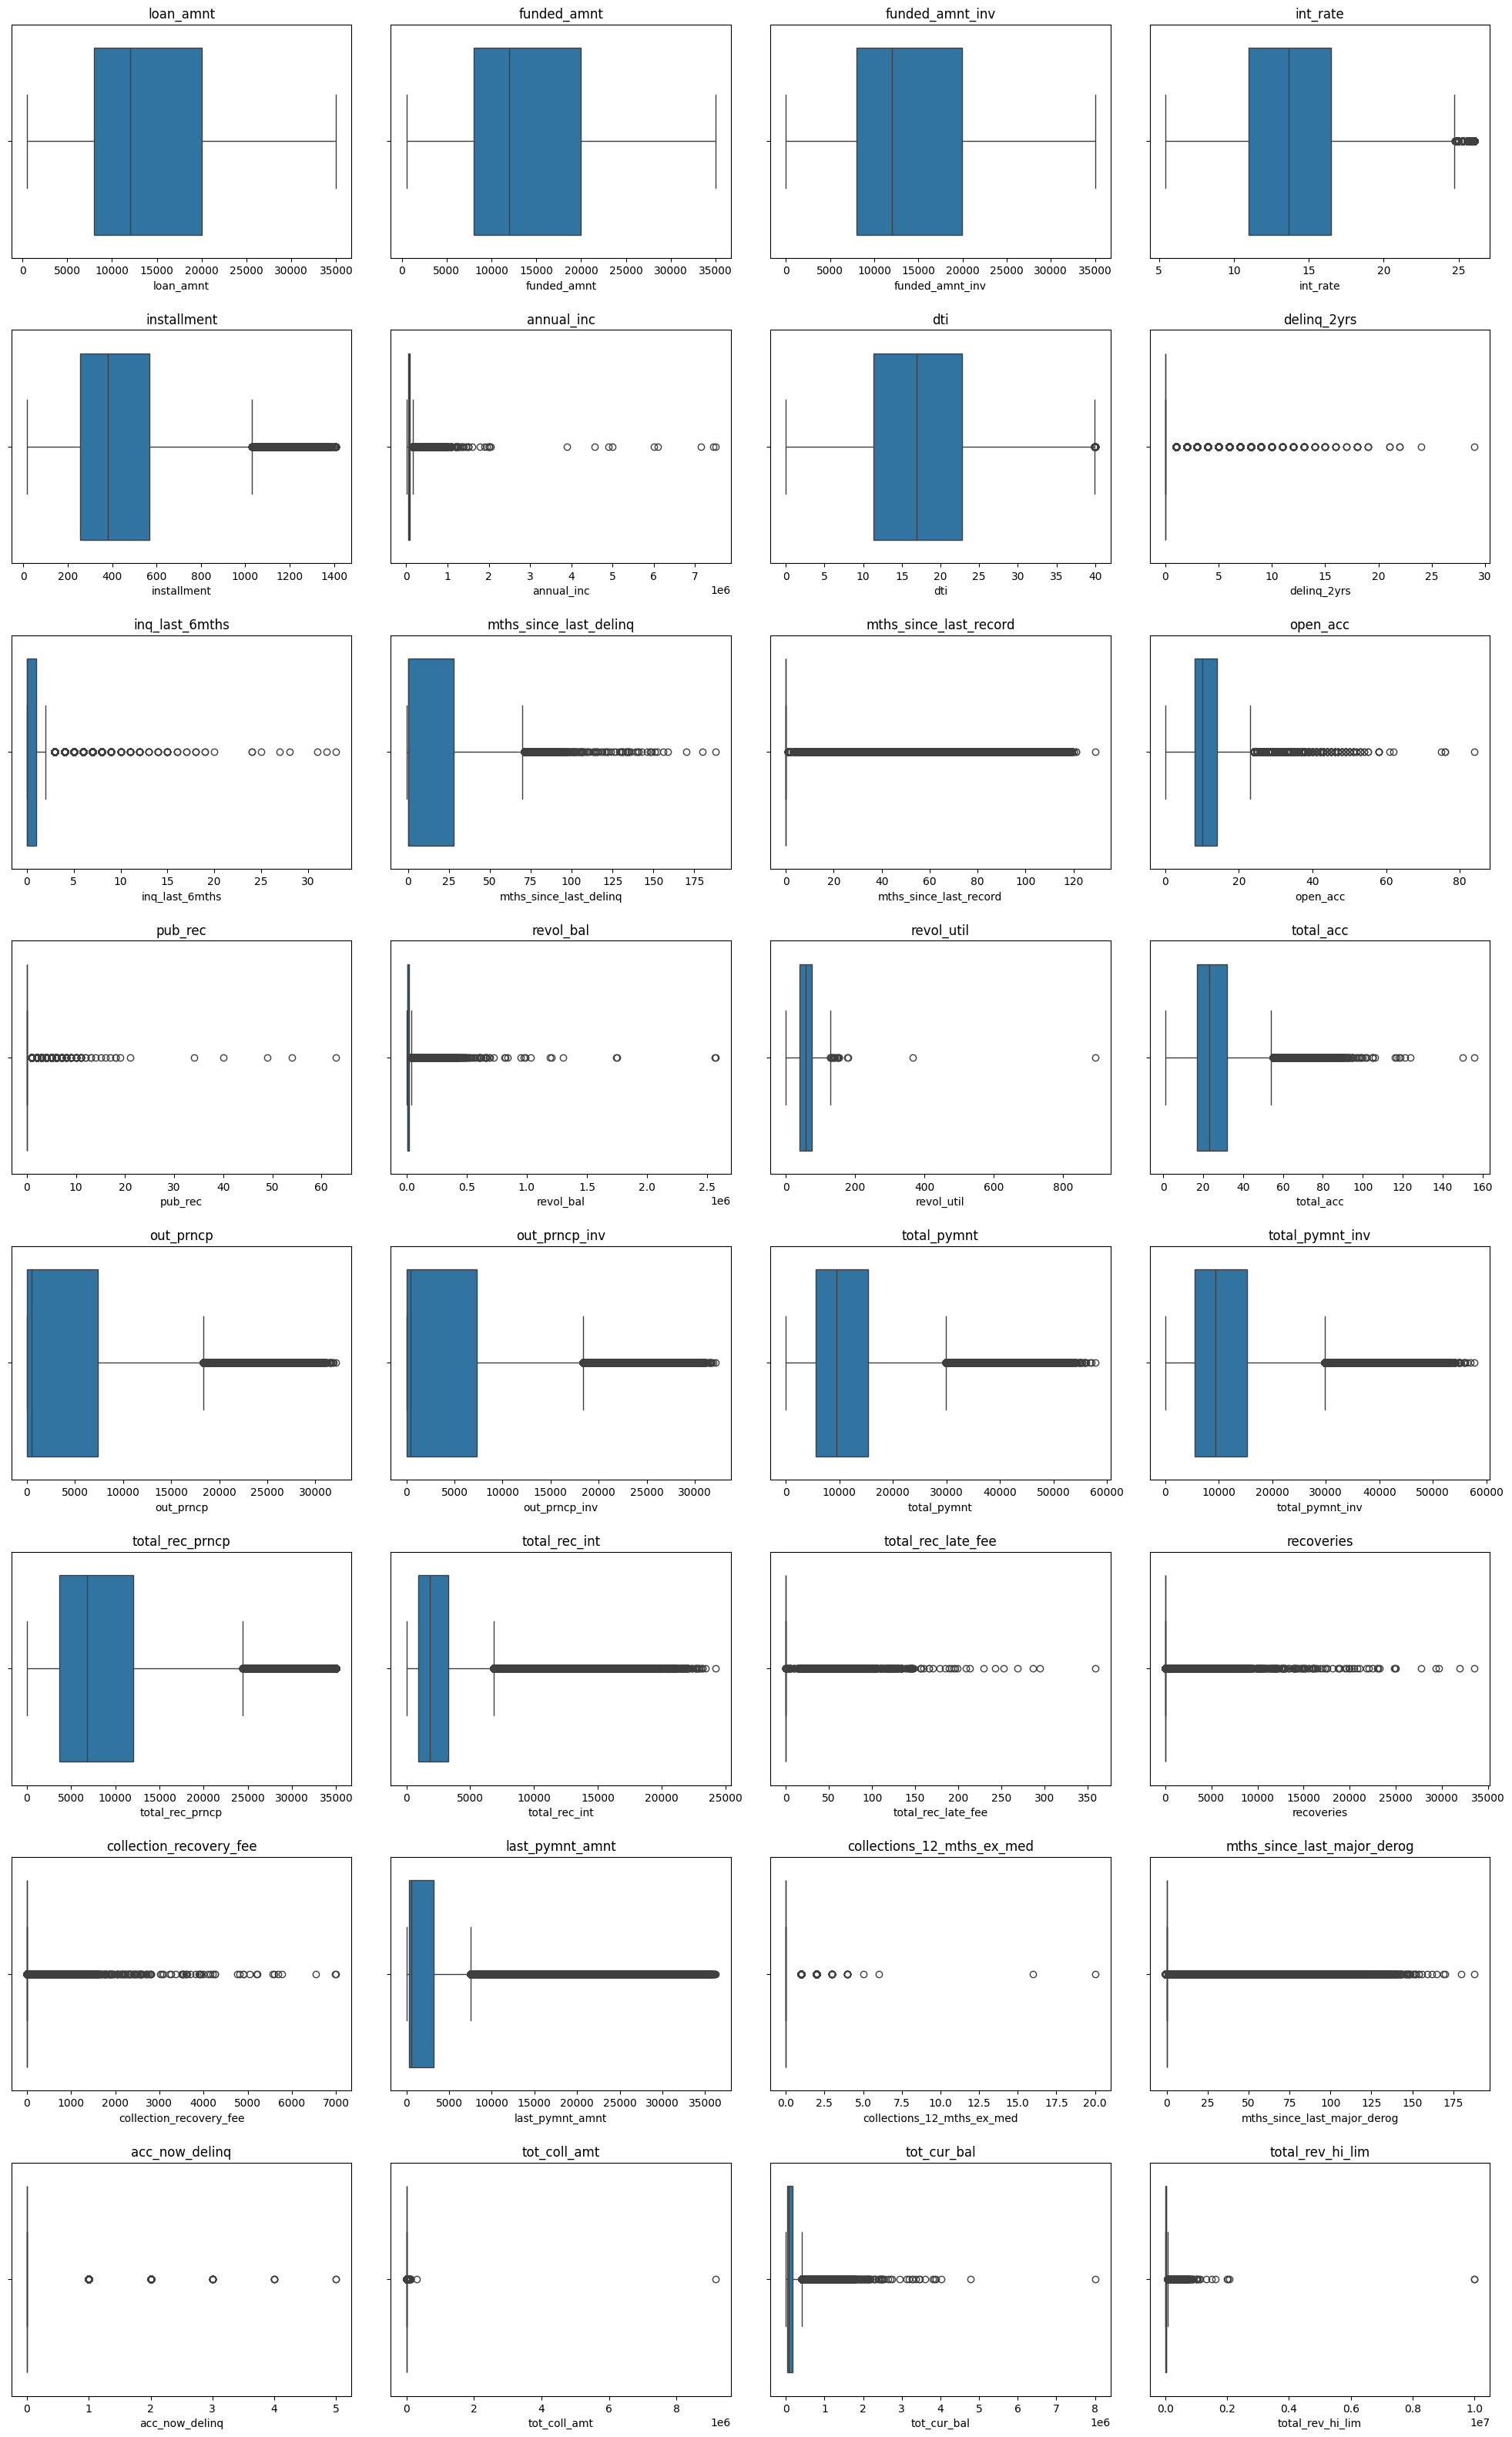

In [ ]:
# display the boxplot of each numerical column
plot_outliers(df, num_columns)

In [ ]:
# function to store outliers info, such as count, rub, & rlb
def outliers_info(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)

  # IQR formula
  IQR = Q3 - Q1
  RUB = Q3 + (1.5 * IQR)
  RLB = Q1 - (1.5 * IQR)

  # count outliers
  count = 0
  for x in df:
    if (x > RUB ) or (x < RLB):
      count += 1

  return count, RUB, RLB

> Fungsi `outliers_info` menghitung jumlah *outlier* dalam setiap kolom numerik dan menyimpan informasi terkait jumlah *outlier*, batas atas (RUB), dan batas bawah (RLB). Perhitungan *outlier* menggunakan Tukey's Rule, yang didasarkan pada rentang interkuartil (IQR).

In [ ]:
def print_outliers(df, num_cols):
  outliers_dict = dict() # store the column name and the number of outliers present

  # print all numerical features with outliers
  for col in num_columns:
    total_outliers = outliers_info(df[col])[0] # function call: get outliers info

    if total_outliers > 0:
      outliers_dict[col] = total_outliers # only store the columns with outliers

  # sort the dictionary by the number of outliers in descending order
  sorted_col_outliers = dict(sorted(outliers_dict.items(), key=lambda item: item[1], reverse=True))

  # print the result
  for key, val in sorted_col_outliers.items():
    print(f'Total outliers in {key}: {val} or {(((val/len(df))) * 100):.3f}% of total data')

  print(f'\nTotal columns with outliers: {len(sorted_col_outliers)} out of {len(num_columns)}')

# function call
print_outliers(df, num_columns)

Total outliers in mths_since_last_major_derog: 183624 or 39.392% of total data
Total outliers in delinq_2yrs: 83281 or 17.866% of total data
Total outliers in last_pymnt_amnt: 70287 or 15.079% of total data
Total outliers in pub_rec: 61352 or 13.162% of total data
Total outliers in mths_since_last_record: 61349 or 13.161% of total data
Total outliers in tot_coll_amt: 49750 or 10.673% of total data
Total outliers in inq_last_6mths: 36754 or 7.885% of total data
Total outliers in total_rec_int: 31133 or 6.679% of total data
Total outliers in total_rev_hi_lim: 25714 or 5.516% of total data
Total outliers in recoveries: 24352 or 5.224% of total data
Total outliers in out_prncp_inv: 23326 or 5.004% of total data
Total outliers in out_prncp: 23319 or 5.003% of total data
Total outliers in collection_recovery_fee: 23187 or 4.974% of total data
Total outliers in revol_bal: 22869 or 4.906% of total data
Total outliers in tot_cur_bal: 21064 or 4.519% of total data
Total outliers in total_rec_prn

> Fungsi `print_outliers` memanggil fungsi `outliers_info` untuk menghitung jumlah *outlier* pada setiap kolom kemudian menampilkan daftar kolom dengan *outliers*, diurutkan dari kolom dengan jumlah *outlier* terbanyak.

> Terlihat bahwa kolom `mths_since_last_major_derog` memiliki jumlah *outliers* yang mencakup 39% dari total data. Menghapus seluruh *outlier* ini akan berdampak signifikan terhadap ukuran *dataset* sehingga diperlukan pendekatan lainnya.

In [ ]:
# outliers handling using capping method
def cap_outliers(df, num_cols):
  for col in num_cols:
    _, RUB, RLB = outliers_info(df[col])
    # clip outliers
    df[col] = df[col].clip(RLB, RUB)
  return df

# function call
df_capped = cap_outliers(df, num_columns)

# recheck outliers
print_outliers(df_capped, num_columns)


Total columns with outliers: 0 out of 32


> Oleh karena itu, metode ***capping*** digunakan untuk menangani *outliers* tersebut. Pendekatan ini dipilih karena *outlier* dalam data kredit berpotensi mengandung informasi penting. Dengan metode ini, nilai ekstrem tidak dihapus, tetapi digantikan dengan batas atas atau bawah pada setiap kolom. Terlihat bahwa setelah dilakukan *capping*, tidak ada lagi kolom yang memiliki outliers.

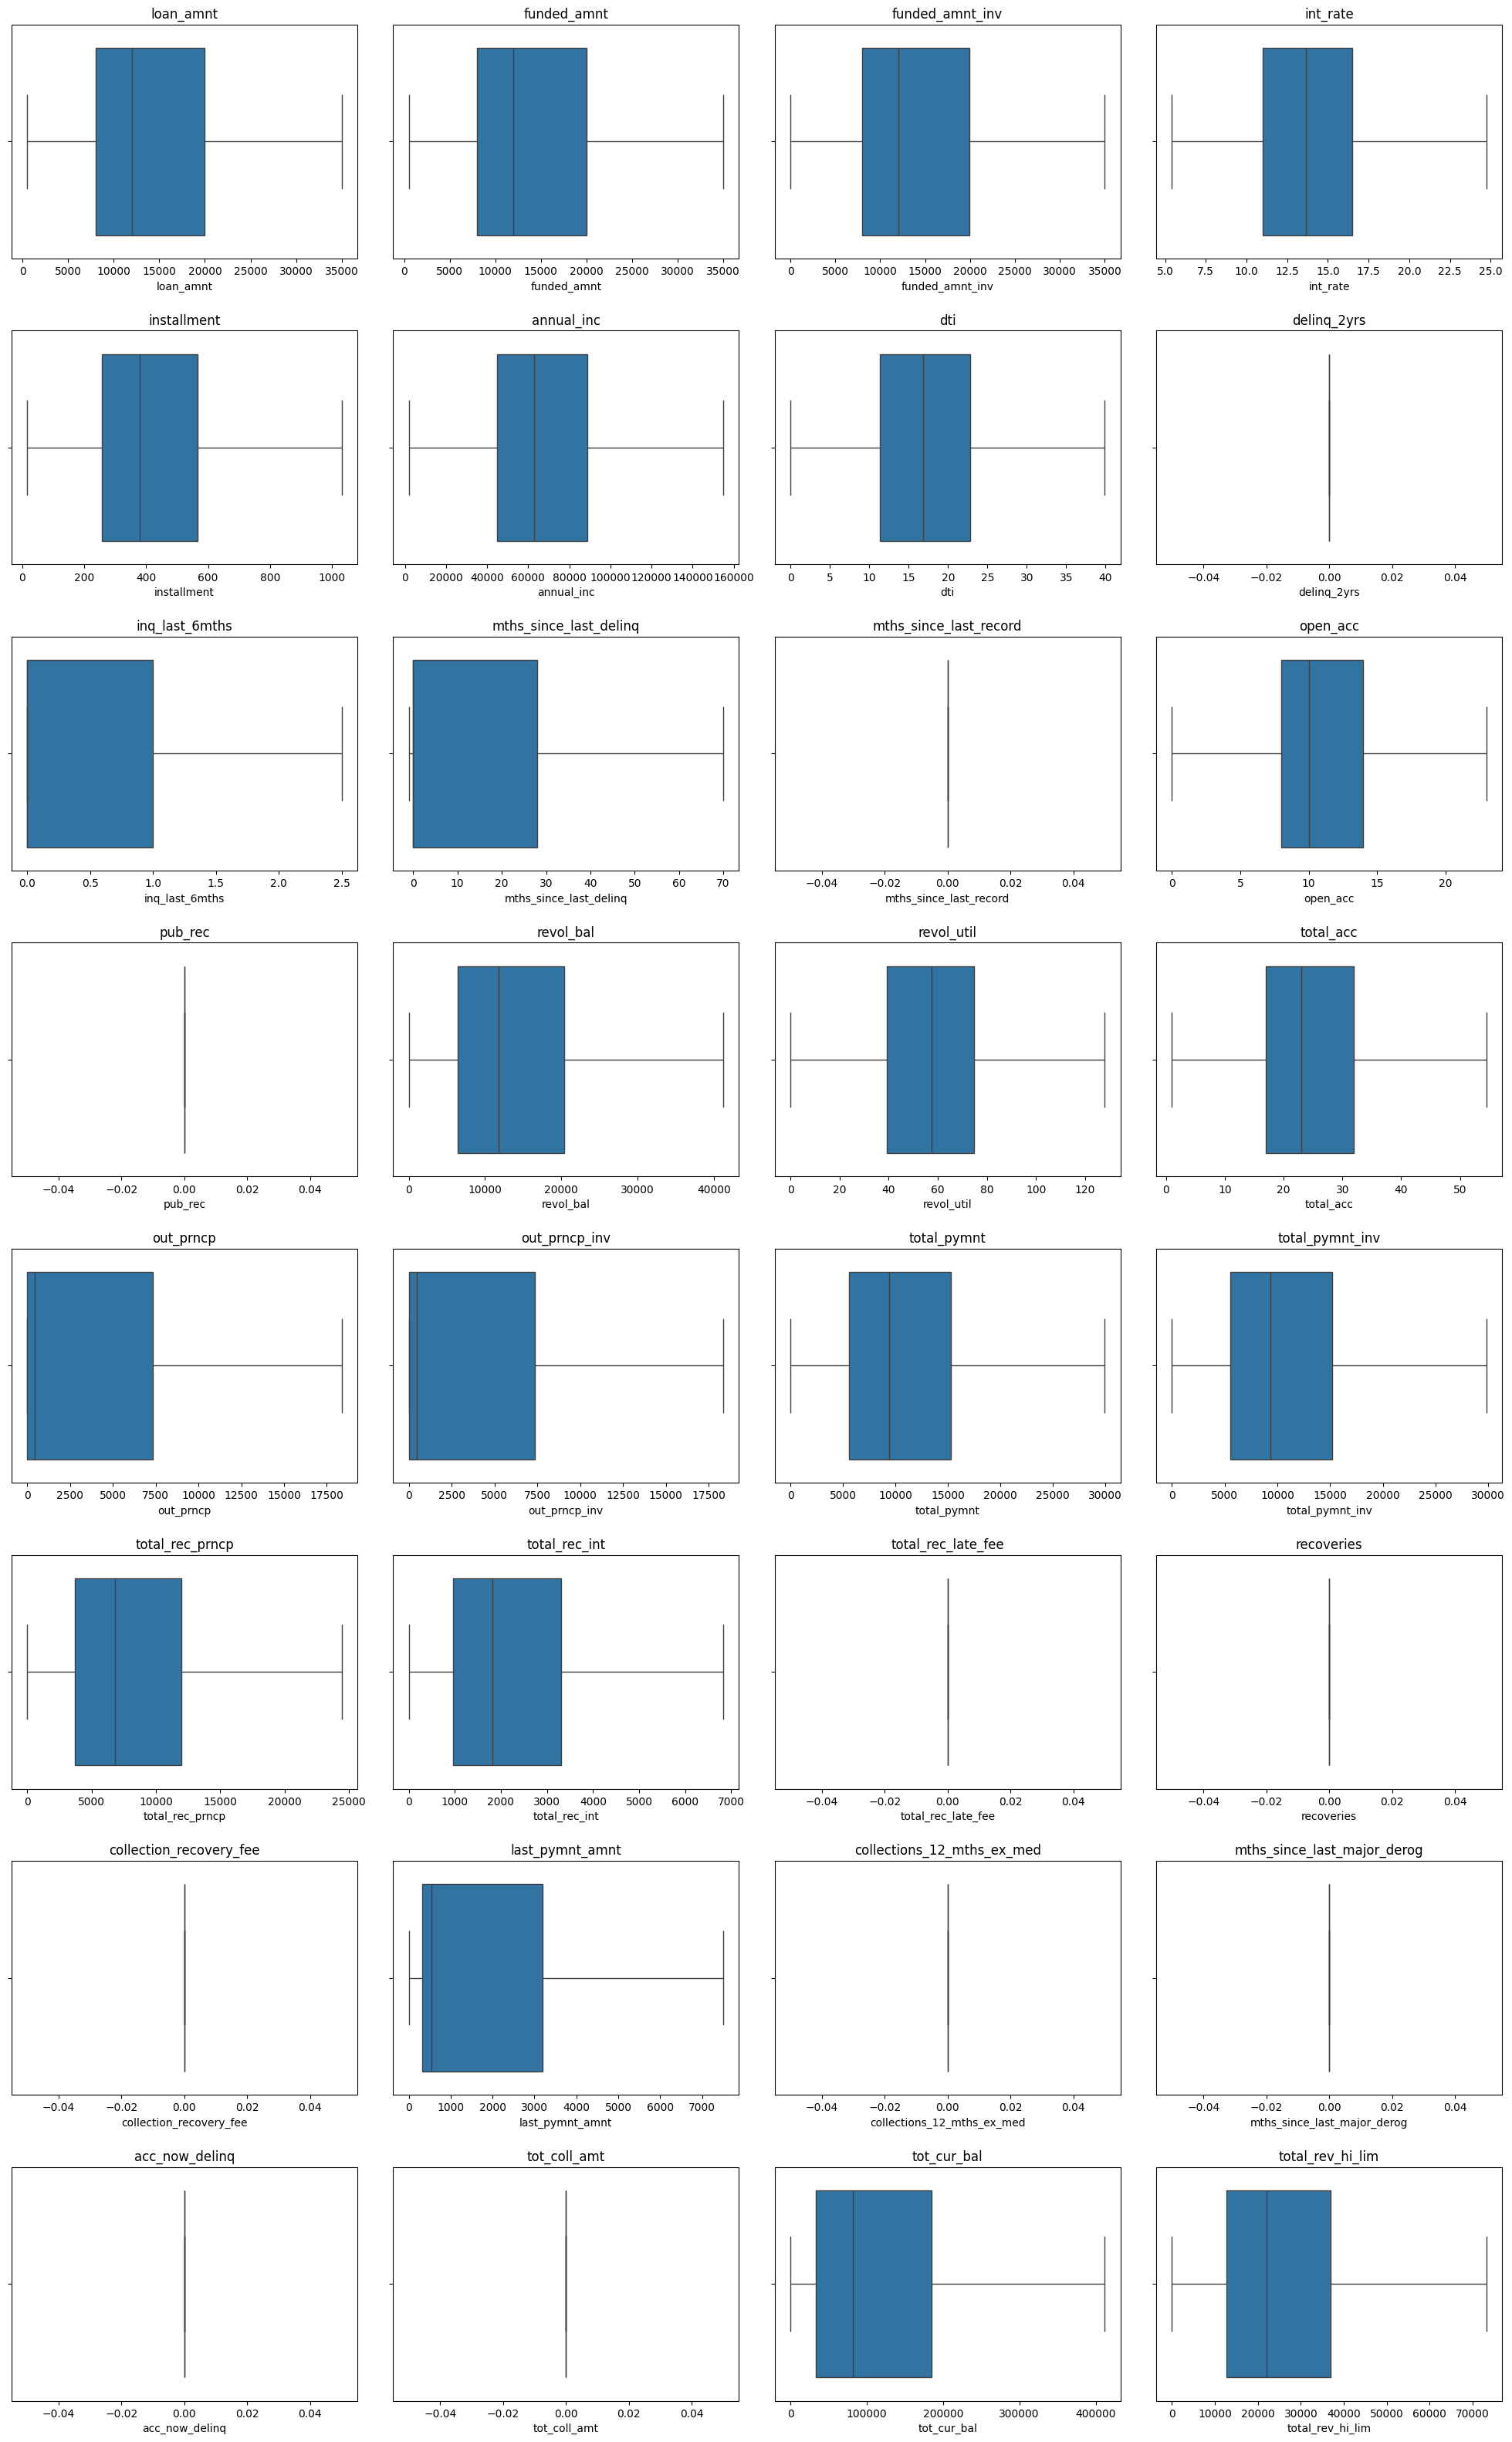

In [ ]:
# redisplay boxplot after capping
plot_outliers(df_capped, num_columns)

### **Feature Encoding**

In [ ]:
df_capped.select_dtypes('object').columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'initial_list_status', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'application_type'],
      dtype='object')

In [ ]:
# remove high cardinality columns before encoding
df_capped = df_capped.drop(columns=['emp_title', 'url', 'desc', 'title', 'zip_code',
                                    'last_pymnt_d', 'next_pymnt_d','last_credit_pull_d', 'application_type'])

> Sebelum proses *encoding*, beberapa kolom dengan jumlah nilai unik yang sangat tinggi dihapus untuk menghindari *high dimensionality* pada data.

In [ ]:
# grouping addr_state based on their region
state_to_region = {
    **dict.fromkeys(['CT', 'MA', 'ME', 'NH', 'RI', 'VT', 'NJ', 'NY', 'PA'], 'NorthEast'),
    **dict.fromkeys(['IL', 'IN', 'MI', 'OH', 'WI', 'IA', 'KS', 'MN', 'MO', 'NE', 'SD'], 'MidWest'),
    **dict.fromkeys(['DC', 'DE', 'FL', 'GA', 'MD', 'NC', 'SC', 'VA', 'WV', 'AL', 'KY', 'MS', 'TN', 'AR', 'LA', 'OK', 'TX'], 'South'),
    **dict.fromkeys(['AZ', 'CO', 'ID', 'MT', 'NV', 'NM', 'UT', 'WY', 'AK', 'CA', 'HI', 'OR', 'WA'], 'West')
} # state to region mapping

# apply mapping
df_capped['state_region'] = df_capped['addr_state'].map(state_to_region)

# display change
display(df_capped[['addr_state', 'state_region']])

# drop addr_state column
df_capped = df_capped.drop(columns=['addr_state'])

addr_state state_region
0              AZ         West
1              GA        South
2              IL      MidWest
3              CA         West
4              OR         West
...           ...          ...
466280         TX        South
466281         TN        South
466282         OH      MidWest
466283         CA         West
466284         CA         West

[466140 rows x 2 columns]

> Kolom `addr_state` memiliki sekitar 50 nilai unik yang berpotensi memengaruhi prediksi jika lokasi peminjam dianggap relevan. Oleh karena itu, nilai dalam kolom ini dikelompokkan ke dalam 4 *region* berdasarkan pembagian wilayah di USA, yaitu North East, West, Mid West, dan South.

In [ ]:
# grouping purposed based on broader categories
purpose_grouping = {
    **dict.fromkeys(['credit_card', 'debt_consolidation'], 'Debt Management'),
    **dict.fromkeys(['small_business', 'educational'], 'Business & Education'),
    **dict.fromkeys(['home_improvement', 'house', 'renewable_energy', 'major_purchase', 'car'], 'Home & Major Purchases'),
    **dict.fromkeys(['medical', 'moving', 'vacation', 'wedding'], 'Personal & Lifestyle'),
    **dict.fromkeys(['other'], 'Other')
} # purposes mapping

# apply mapping
df_capped['purpose_grouped'] = df_capped['purpose'].map(purpose_grouping)

# display change
display(df_capped[['purpose', 'purpose_grouped']])

# drop purpose column
df_capped = df_capped.drop(columns=['purpose'])

purpose         purpose_grouped
0              credit_card         Debt Management
1                      car  Home & Major Purchases
2           small_business    Business & Education
3                    other                   Other
4                    other                   Other
...                    ...                     ...
466280  debt_consolidation         Debt Management
466281  debt_consolidation         Debt Management
466282  debt_consolidation         Debt Management
466283         credit_card         Debt Management
466284               other                   Other

[466140 rows x 2 columns]

> Hal yang serupa juga diterapkan pada kolom `purpose` dimana beberapa nilai akan dikelompokkan untuk mencegah *high dimensionality* pada data.

#### **Manual Encoding**

In [ ]:
# grouping loan_status based on risk indication -> label of the dataset
loan_status_grouping = {
    **dict.fromkeys(['Fully Paid', 'Current', 'Does not meet the credit policy. Status:Fully Paid', 'In Grace Period'], 0), # indicates good risk
    **dict.fromkeys(['Charged Off', 'Default', 'Late (16-30 days)', 'Late (31-120 days)', 'Does not meet the credit policy. Status:Charged Off'], 1) # indicates bad risk
}

# apply mapping
df_capped['loan_risk'] = df_capped['loan_status'].map(loan_status_grouping)

# display change
display(df_capped[['loan_status', 'loan_risk']])

# drop loan_status column
df_capped = df_capped.drop(columns=['loan_status'])

loan_status  loan_risk
0        Fully Paid          0
1       Charged Off          1
2        Fully Paid          0
3        Fully Paid          0
4           Current          0
...             ...        ...
466280      Current          0
466281  Charged Off          1
466282      Current          0
466283   Fully Paid          0
466284      Current          0

[466140 rows x 2 columns]

> Setelah analisis, kolom `loan_status` ditetapkan sebagai label (target) dalam proses klasifikasi ini. Status pinjaman dikelompokkan menjadi dua kelas berdasarkan tingkat risiko, yaitu:
- **Class 0 (*good risk*)**: 'Fully Paid', 'Current', 'Does not meet the credit policy. Status:Fully Paid', dan 'In Grace Period'
  - 'In Grace Period' dianggap sebagai *good risk* karena belum termasuk keterlambatan dan masih memiliki potensi untuk *recover*.
- **Class 1 (*bad risk*)**: 'Charged Off', 'Default', 'Late (16-30 days)', 'Late (31-120 days)', 'Does not meet the credit policy. Status:Charged Off'
  - 'Late (16-30 days)' dianggap sebagai *bad risk* karena memiliki potensi berkembang menjadi keterlambatan yang lebih serius (delinquency).

In [ ]:
# remove the word 'months' in term and convert it to numerical type
df_capped['term'] = df_capped['term'].str.replace(' months', '').astype(int)

> Kolom `term` berisi dua nilai unik, yaitu'36 months' dan '60 months'. Nilai ini dapat langsung dikonversi ke bentuk numerik dengan menghapus kata 'months' sehingga hanya menyisakan angka 36 dan 60. Setelah dikonversi menjadi numerik, nilai ini akan melalui proses standarisasi pada tahapan *feature scaling*.

In [ ]:
# map emp_length to numerical value based on the employment year
emp_length_mapping = {
    '< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3,
    '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7,
    '8 years': 8, '9 years': 9, '10+ years': 10, 'Not Recorded': -1
}

# apply mapping
df_capped['emp_length'] = df_capped['emp_length'].map(emp_length_mapping)

> Kolom `emp_length` dikonversi ke bentuk numerik berdasarkan lama pengalaman kerja dengan tambahan aturan sebagai berikut:
- < 1 tahun: 0
- 10 tahun ke atas: 10
- Nilai yang tidak tersedia: -1

In [ ]:
# binary encoding for column pymnt_plan and initial_list_status
df_capped['pymnt_plan'] = df_capped['pymnt_plan'].map({'n': 0, 'y': 1})
df_capped['initial_list_status'] = df_capped['initial_list_status'].map({'f': 0, 'w':1})

> Dilakukan juga *binary encoding* pada kolom `pymnt_plan` dan `initial_list_status` yang hanya mengandung dua nilai unik.

In [ ]:
# ordinal encoding for grade and sub_grade
grade_encoded = {
    'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7
}

# apply mapping to grade
df_capped['grade'] = df_capped['grade'].map(grade_encoded)

# encode sub_grade based on the order
sub_grade_ordered = sorted(df_capped['sub_grade'].unique())
sub_grade_mapping = {sub_grade: i+1 for i, sub_grade in enumerate(sub_grade_ordered)}

# apply mapping to sub_grade
df_capped['sub_grade'] = df_capped['sub_grade'].map(sub_grade_mapping)

# display result
df_capped[['grade', 'sub_grade']]

grade  sub_grade
0           2          7
1           3         14
2           3         15
3           3         11
4           2         10
...       ...        ...
466280      3         12
466281      4         20
466282      4         16
466283      1          4
466284      4         18

[466140 rows x 2 columns]

> Kolom `grade` dan `sub_grade` bersifat ordinal. Maka dari itu, perlu dipastikan hasil *encoding* menunjukkan urutan yang benar.

#### **One-Hot Encoding**

In [ ]:
cat_columns = df_capped.select_dtypes('object').columns
cat_columns

Index(['home_ownership', 'verification_status', 'state_region',
       'purpose_grouped'],
      dtype='object')

In [ ]:
# display unique values of categorical columns
for col in cat_columns:
  print(f'Unique values of {col}: \n{df_capped[col].unique()}')

Unique values of home_ownership: 
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']
Unique values of verification_status: 
['Verified' 'Source Verified' 'Not Verified']
Unique values of state_region: 
['West' 'South' 'MidWest' 'NorthEast']
Unique values of purpose_grouped: 
['Debt Management' 'Home & Major Purchases' 'Business & Education' 'Other'
 'Personal & Lifestyle']


In [ ]:
# one hot encoding using pd.get_dummies()
df_capped = pd.get_dummies(df_capped, columns=cat_columns, drop_first=True)

# df info after encoding
df_capped.info()

# display result
display(df_capped.head(15))

<class 'pandas.core.frame.DataFrame'>
Index: 466140 entries, 0 to 466284
Data columns (total 56 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   loan_amnt                               466140 non-null  int64         
 1   funded_amnt                             466140 non-null  int64         
 2   funded_amnt_inv                         466140 non-null  float64       
 3   term                                    466140 non-null  int64         
 4   int_rate                                466140 non-null  float64       
 5   installment                             466140 non-null  float64       
 6   grade                                   466140 non-null  int64         
 7   sub_grade                               466140 non-null  int64         
 8   emp_length                              466140 non-null  int64         
 9   annual_inc                              46

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment  \
0        5000         5000           4975.0    36     10.65       162.87   
1        2500         2500           2500.0    60     15.27        59.83   
2        2400         2400           2400.0    36     15.96        84.33   
3       10000        10000          10000.0    36     13.49       339.31   
4        3000         3000           3000.0    60     12.69        67.79   
5        5000         5000           5000.0    36      7.90       156.46   
6        7000         7000           7000.0    60     15.96       170.08   
7        3000         3000           3000.0    36     18.64       109.43   
8        5600         5600           5600.0    60     21.28       152.39   
9        5375         5375           5350.0    60     12.69       121.45   
10       6500         6500           6500.0    60     14.65       153.45   
11      12000        12000          12000.0    36     12.69       402.54   
12       9000         9000           9000.0    36     13.49       305.38   
13       3000         3000           3000.0    36      9.91        96.68   
14      10000        10000          10000.0    36     10.65       325.74   

    grade  sub_grade  emp_length  annual_inc  ... home_ownership_RENT  \
0       2          7          10     24000.0  ...                True   
1       3         14           0     30000.0  ...                True   
2       3         15          10     12252.0  ...                True   
3       3         11          10     49200.0  ...                True   
4       2         10           1     80000.0  ...                True   
5       1          4           3     36000.0  ...                True   
6       3         15           8     47004.0  ...                True   
7       5         21           9     48000.0  ...                True   
8       6         27           4     40000.0  ...               False   
9       2         10           0     15000.0  ...                True   
10      3         13           5     72000.0  ...               False   
11      2         10          10     75000.0  ...               False   
12      3         11           0     30000.0  ...                True   
13      2          6           3     15000.0  ...                True   
14      2          7           3    100000.0  ...                True   

    verification_status_Source Verified  verification_status_Verified  \
0                                 False                          True   
1                                  True                         False   
2                                 False                         False   
3                                  True                         False   
4                                  True                         False   
5                                  True                         False   
6                                 False                         False   
7                                  True                         False   
8                                  True                         False   
9                                 False                          True   
10                                False                         False   
11                                 True                         False   
12                                 True                         False   
13                                 True                         False   
14                                 True                         False   

    state_region_NorthEast state_region_South  state_region_West  \
0                    False              False               True   
1                    False               True              False   
2                    False              False              False   
3                    False              False               True   
4                    False              False               True   
5                    False              F

> Untuk kolom kategorikal yang tersisa, dilakukan one hot encoding menggunakan sintaks bawaan pandas yaitu `pd.get_dummies()`. Hal ini dapat dilakukan karena beberapa kolom memiliki nilai yang sudah dikelompokkan sehingga proses *encoding* ini tidak menghasilkan jumlah kolom baru yang berlebihan. Setelah *encoding*, *dataset* memiliki total 55 kolom.

### **Feature Selection**

> Sebelum melakukan *scaling*, dilakukan seleksi fitur untuk mengurangi dimensi dataset dan mempertahankan fitur yang paling relevan dalam menentukan label. *Feature selection* dilakukan dalam dua tahap:
- Menghapus fitur dengan korelasi tinggi (*highly correlated features*)
- Menggunakan *embedded method* dengan **Random Forest Classifier**

In [ ]:
# drop datetime columns before scaling to prevent issue
df_capped = df_capped.drop(columns=['issue_d', 'earliest_cr_line'])

> Kolom `issue_d` dan `earliest_cr_line` yang merupakan tipe datetime dihapus untuk mencegah error pada saat *scaling*.

In [ ]:
# convert boolean columns to int
bool_columns = df_capped.select_dtypes('bool').columns
df_capped[bool_columns] = df_capped[bool_columns].astype(int)

> Kolom yang bertipe boolean dari hasil *encoding* dikonversi ke bentuk integer sehingga semua kolom memiliki tipe data yang seragam sebelum dilakukan *scaling*.

In [ ]:
df_capped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466140 entries, 0 to 466284
Data columns (total 54 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   loan_amnt                               466140 non-null  int64  
 1   funded_amnt                             466140 non-null  int64  
 2   funded_amnt_inv                         466140 non-null  float64
 3   term                                    466140 non-null  int64  
 4   int_rate                                466140 non-null  float64
 5   installment                             466140 non-null  float64
 6   grade                                   466140 non-null  int64  
 7   sub_grade                               466140 non-null  int64  
 8   emp_length                              466140 non-null  int64  
 9   annual_inc                              466140 non-null  float64
 10  pymnt_plan                              466140 no

In [ ]:
# separate target variable from features
X = df_capped.drop('loan_risk', axis=1)
y = df_capped['loan_risk']

In [ ]:
# determine highly correlated features based on threshold
corr_matrix = X.corr()
high_corr_feats = set()
threshold = 0.85

for i in range(len(corr_matrix.columns)):
  # loop through the lower triangle of the correlation matrix to avoid redundancy
  for j in range(i):
    # check if the absolute correlation exceeds the threshold
    if abs(corr_matrix.iloc[i, j]) > threshold:
      col_name = corr_matrix.columns[i] # get the name of the column
      high_corr_feats.add(col_name) # add the column to the set

print(f'Columns with high correlation (> 0.85): {high_corr_feats}')

# drop highly correlated features
X_filtered = X.drop(columns=high_corr_feats)

Columns with high correlation (> 0.85): {'sub_grade', 'total_pymnt_inv', 'out_prncp_inv', 'funded_amnt', 'grade', 'funded_amnt_inv', 'total_rec_prncp', 'installment'}


> Tahapan pertama adalah dengan mengidentifikasi dan menghapus fitur dengan korelasi yang tinggi (melebihi ambang batas 0.85). Hal ini dilakukan dengan memanfaatkan method `corr()` kemudian melakukan iterasi pada segitiga bawah dari matriks korelasi untuk menghindari pemeriksaan yang redundan. Dataset hasil seleksi akan disimpan dalam `X_filtered` yang akan digunakan untuk proses seleksi lebih lanjut menggunakan RF classifier.

In [ ]:
# feature selection using random forest classifier feature importances
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_filtered, y)

# get feature importances
feature_importance = pd.Series(model.feature_importances_, index=X_filtered.columns)

# select top 12 features
top_12_feats = feature_importance.sort_values(ascending=False).head(12)

# get the names of the selected features
top_12_feats_name = top_12_feats.index.tolist()

# display the selected features and its importance score
display(top_12_feats)

out_prncp           0.181865
total_pymnt         0.181148
last_pymnt_amnt     0.162035
loan_amnt           0.093194
total_rec_int       0.056564
int_rate            0.046305
tot_cur_bal         0.028939
dti                 0.026143
revol_util          0.025827
revol_bal           0.025507
total_rev_hi_lim    0.024705
annual_inc          0.023646
dtype: float64

> Tahapan ini memanfaatkan *feature importances* dari Random Forest Classifier untuk mengurutkan fitur berdasarkan pengaruhnya terhadap variabel target. Karena jumlah fitur cukup banyak, seleksi dibatasi menjadi 12 fitur saja dengan tetap mempertahankan relevansinya.

In [ ]:
# update X after feature selection
X_selected = X[top_12_feats_name]
X_selected

out_prncp   total_pymnt  last_pymnt_amnt  loan_amnt  total_rec_int  \
0            0.00   5861.071414           171.62       5000         861.07   
1            0.00   1008.710000           119.66       2500         435.17   
2            0.00   3003.653644           649.91       2400         603.65   
3            0.00  12226.302210           357.48      10000        2209.33   
4          766.90   3242.170000            67.79       3000        1009.07   
...           ...           ...              ...        ...            ...   
466280   12574.00  10383.360000           432.64      18400        4557.36   
466281       0.00   4677.920000            17.50      22000        2840.88   
466282   14428.31  12343.980000           514.34      20700        6072.29   
466283       0.00   2126.579838          1500.68       2000         126.58   
466284    3984.38   8821.620000           367.58      10000        2806.00   

        int_rate  tot_cur_bal    dti  revol_util  revol_bal  total_rev_hi_lim  \
0          10.65    81539.000  27.65        83.7    13648.0      23432.743872   
1          15.27    81539.000   1.00         9.4     1687.0       2896.471198   
2          15.96    81539.000   8.72        98.5     2956.0       5075.263107   
3          13.49    81539.000  20.00        21.0     5598.0       9611.408279   
4          12.69    81539.000  17.94        53.9    27783.0      47701.635623   
...          ...          ...    ...         ...        ...               ...   
466280     14.47   294998.000  19.85        77.6    23208.0      29900.000000   
466281     19.97   221830.000  18.45        46.3    18238.0      39400.000000   
466282     16.99    73598.000  25.65        51.1     6688.0      13100.000000   
466283      7.90   412050.125   5.39        21.5    11404.0      53100.000000   
466284     19.20    57477.000  22.78        70.8    11325.0      16000.000000   

        annual_inc  
0          24000.0  
1          30000.0  
2          12252.0  
3          49200.0  
4          80000.0  
...            ...  
466280    110000.0  
466281     78000.0  
466282     46000.0  
466283     83000.0  
466284     46000.0  

[466140 rows x 12 columns]

### **Feature Scaling**

In [ ]:
# standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# convert scaled array to dataframe
X_scaled = pd.DataFrame(X_scaled, columns=top_12_feats_name, index=X.index)
X_scaled

out_prncp  total_pymnt  last_pymnt_amnt  loan_amnt  total_rec_int  \
0       -0.731074    -0.724486        -0.690925  -1.124762      -0.813767   
1       -0.731074    -1.373124        -0.709876  -1.426473      -1.038198   
2       -0.731074    -1.106450        -0.516482  -1.438541      -0.949416   
3       -0.731074     0.126384        -0.623138  -0.521340      -0.103291   
4       -0.597534    -1.074567        -0.728794  -1.366131      -0.735777   
...           ...          ...              ...        ...            ...   
466280   1.458422    -0.119970        -0.595725   0.492409       1.134021   
466281  -0.731074    -0.882643        -0.747136   0.926872       0.229509   
466282   1.781310     0.142115        -0.565927   0.769983       1.932324   
466283  -0.731074    -1.223693        -0.206187  -1.486815      -1.200811   
466284  -0.037279    -0.328735        -0.619454  -0.521340       0.211129   

        int_rate  tot_cur_bal       dti  revol_util  revol_bal  \
0      -0.731433    -0.365109  1.328443    1.161239  -0.097220   
1       0.333841    -0.365109 -2.066315   -1.970711  -1.199404   
2       0.492940    -0.365109 -1.082918    1.785100  -1.082468   
3      -0.076590    -0.365109  0.353963   -1.481739  -0.839013   
4      -0.261053    -0.365109  0.091554   -0.094913   1.205294   
...          ...          ...       ...         ...        ...   
466280  0.149378     1.498584  0.334855    0.904107   0.783716   
466281  1.417561     0.859760  0.156519   -0.415274   0.325740   
466282  0.730436    -0.434441  1.073677   -0.212941  -0.738571   
466283 -1.365525     2.520557 -1.507103   -1.460663  -0.304001   
466284  1.240015    -0.575192  0.708088    0.617468  -0.311280   

        total_rev_hi_lim  annual_inc  
0              -0.194155   -1.369171  
1              -1.272128   -1.191397  
2              -1.157761   -1.717252  
3              -0.919653   -0.622521  
4               1.079747    0.290050  
...                  ...         ...  
466280          0.145318    1.178918  
466281          0.643984    0.230792  
466282         -0.736533   -0.717334  
466283          1.363113    0.378937  
466284         -0.584309   -0.717334  

[466140 rows x 12 columns]

> ***Standardization (Z-score normalization)*** digunakan untuk mengubah rata-rata kolom menjadi 0 dan standar deviasi menjadi 1. Proses ini dilakukan hanya terhadap 12 fitur yang telah dipilih sebelumnya.

### **Data Splitting**

In [ ]:
# split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.1, random_state=42, shuffle=True)

print(f'Training set dimension: {X_train.shape}')
print(f'Testing set dimension: {X_test.shape}')

Training set dimension: (419526, 12)
Testing set dimension: (46614, 12)


In [ ]:
# check class label proportions
y.value_counts(normalize=True)

loan_risk
0    0.888107
1    0.111893
Name: proportion, dtype: float64

> Terlihat distribusi kelas pada label sangat tidak seimbang, di mana data kelas 0 (good risk) mencakup hampir 89% dari total data. Hal ini tentunya berpotensi menyebabkan bias pada saat klasifikasi, di mana model cenderung memprediksi kelas mayoritas dibanding kelas minoritas. Untuk itu, dilakukan tahapan *resampling*, seperti *oversampling* dengan **SMOTE**.

In [ ]:
# resampling using SMOTE
smote = SMOTE(random_state=42)
X_tr_resampled, y_tr_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# recheck label proportion
print(pd.Series(y_tr_resampled.value_counts(normalize=True)))

loan_risk
0    0.5
1    0.5
Name: proportion, dtype: float64


> Setelah *oversampling*, proporsi label sudah seimbang sehingga model memiliki peluang lebih baik dalam mengenali kedua kelas dengan lebih adil.

In [ ]:
print(f'Training set dimension after resampling: {X_tr_resampled.shape}')

Training set dimension after resampling: (745168, 12)


## **Modeling**

> Proses klasifikasi dilakukan dengan menggunakan beberapa pilihan algoritma, seperti **Logistic Regression**, **Random Forest Classifier** dan **XGBBoost**. Hasil evaluasi setiap model kemudian akan dibandingkan pada sebuah tabel dan divisualisasikan untuk mempermudah menentukan model dengan performa terbaik.

### **Functions Used**

> Terdapat beberapa fungsi yang digunakan selama tahapan modeling, yaitu:
- `learning_curve_plot()`: menampilkan visualisasi performa model berdasarkan metrik akurasi terhadap jumlah dataset yang digunakan. Informasi ini berguna untuk mengidentifikasi terjadinya *overfitting* atau *underfitting* sehingga langkah perbaikan dapat dilakukan jika diperlukan.
- `train_test_acc()`: memberikan informasi terkait nilai akurasi pada data latih dan uji untuk melihat jarak antara keduanya. Hal ini juga membantu dalam mengidentifikasi apakah terjadi *overfitting* atau *underfitting* pada model.
- `evaluate_model()`: menampilkan beberapa hasil evaluasi, berupa *confusion matrix*, nilai metrik (*accuracy*, *precision*, *recall*, *f1-score*, dan ROC-AUC), serta *classification report*.
- `cm_visualization()`: menampilkan visualisasi *confusion matrix* menggunakan heatmap.

In [ ]:
# function to visualize model's learning curve
def learning_curve_plot(model, X, y, cv=5):
  # define cross-validation using stratifiedkfold
  cv = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)

  # compute the learning curve
  train_sizes, train_scores, test_scores = learning_curve(
      model, X, y, cv=cv, scoring='accuracy',
      n_jobs=4, train_sizes=np.linspace(0.3, 1.0, 5)
  )

  # calculate the mean and standard deviation
  train_mean = np.mean(train_scores, axis=1)
  train_std = np.std(train_scores, axis=1)
  test_mean = np.mean(test_scores, axis=1)
  test_std = np.std(test_scores, axis=1)

  # plot the learning curve
  plt.figure(figsize=(8,5))

  plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Accuracy')
  plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)

  plt.plot(train_sizes, test_mean, 'o-', color='orange', label='Cross-Validation Accuracy')
  plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='orange', alpha=0.2)

  plt.xlabel('Training Set Size')
  plt.ylabel('Accuracy')
  plt.title(f'{model.__class__.__name__} Learning Curve')
  plt.legend()
  plt.show()

In [ ]:
# function to evaluate training and testing accuracy
def train_test_acc(model, X_train, y_train, X_test, y_test):
  train_acc = model.score(X_train, y_train)
  test_acc = model.score(X_test, y_test)

  print(f'Training accuracy: {train_acc:.3f}')
  print(f'Testing accuracy: {test_acc:.3f}')

In [ ]:
# function to display model's evaluation based on metrics, confusion matrix, & classification reports
def evaluate_model(model, X, y, cv=5):
  # model prediction using cross-validation
  y_pred = cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
  y_pred_proba = cross_val_predict(model, X, y, cv=cv, method='predict_proba')[:, 1]

  # confusion matrix
  cm = confusion_matrix(y_test, y_pred)

  # classification report
  cr = classification_report(y_test, y_pred)

  # cross-validation metric scores
  accuracy = np.round(np.mean(cross_val_score(model, X, y, cv=cv, scoring='accuracy', n_jobs=-1)), 3)
  precision = np.round(np.mean(cross_val_score(model, X, y, cv=cv, scoring='precision', n_jobs=-1)), 3)
  recall = np.round(np.mean(cross_val_score(model, X, y, cv=cv, scoring='recall', n_jobs=-1)), 3)
  f1_score = np.round(np.mean(cross_val_score(model, X, y, cv=cv, scoring='f1', n_jobs=-1)), 3)
  roc_auc = np.round(roc_auc_score(y, y_pred_proba), 3)

  # display information
  print(f'==== {model.__class__.__name__} ====')
  print('\nConfusion Matrix')
  print(cm)
  print('\nMetrics Score (Cross-Validated)')
  print(f'Accuracy: {accuracy}')
  print(f'Precision: {precision}')
  print(f'Recall: {recall}')
  print(f'F1-Score: {f1_score}')
  print(f'ROC-AUC: {roc_auc}')
  print('\nClassification Report')
  print(cr)

  # information summary (used for model's performance comparison)
  summary = {
      'Confusion Matrix': cm,
      'Accuracy': accuracy,
      'Precision': precision,
      'Recall': recall,
      'F1-Score': {f1_score},
      'ROC-AUC': {roc_auc}
  }

  return summary

In [ ]:
# function to visualize confusion matrix using heatmap
def cm_visualization(model, cm, labels):
  plt.figure(figsize=(6, 4))
  sns.heatmap(cm, annot=True, cmap='icefire', cbar=False, fmt='d', xticklabels=labels, yticklabels=labels)

  plt.title(f'{model.__class__.__name__} Confusion Matrix')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

### **Model Training**

#### **1. Logistic Regression**

In [ ]:
# logistic regression model
lr = LogisticRegression(class_weight='balanced', max_iter=1000, solver='saga', random_state=42)

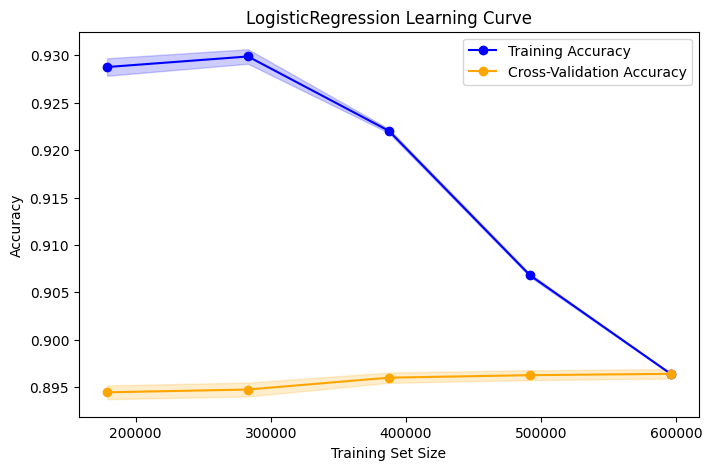

In [ ]:
# learning curve
learning_curve_plot(lr, X_tr_resampled, y_tr_resampled)

In [ ]:
# model training
lr.fit(X_tr_resampled, y_tr_resampled)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42,
                   solver='saga')

In [ ]:
# model evaluation
lr_result = evaluate_model(lr, X_test, y_test)

==== LogisticRegression ====

Confusion Matrix
[[38824  2574]
 [  902  4314]]

Metrics Score (Cross-Validated)
Accuracy: 0.925
Precision: 0.627
Recall: 0.827
F1-Score: 0.713
ROC-AUC: 0.94

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     41398
           1       0.63      0.83      0.71      5216

    accuracy                           0.93     46614
   macro avg       0.80      0.88      0.83     46614
weighted avg       0.94      0.93      0.93     46614



In [ ]:
# training and testing accuracy gap
train_test_acc(lr, X_tr_resampled, y_tr_resampled, X_test, y_test)

Training accuracy: 0.896
Testing accuracy: 0.933


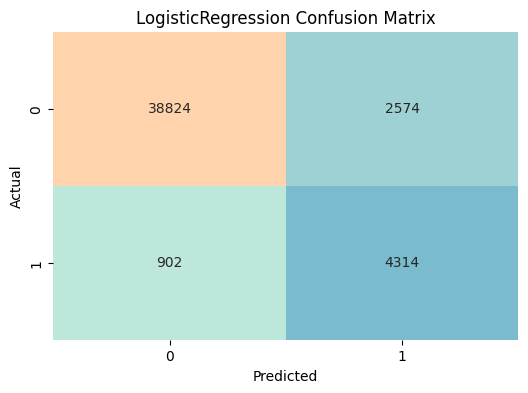

In [ ]:
# confusion matrix visualization
cm_visualization(lr, lr_result['Confusion Matrix'], labels=np.unique(y_test))

> Hasil evaluasi model sebelum *hyperparameter tuning*:
- **Akurasi** model mencapai 0.925, tetapi bisa **menyesatkan** (*misleading*) karena pada *learning curve*, terlihat bahwa akurasi *training* cenderung menurun dan bisa mengindikasikan ***underfitting***. Hal ini juga didukung oleh *gap* yang cukup besar antara *training* dan *testing accuracy*.
- **Precision** cukup rendah (0.627) yang berarti model berpotensi salah mengklasifikasikan calon peminjam yang sebenarnya tergolong "*good risk*" sebagai "*bad risk*" sehingga **pengajuan mereka berkemungkinan ditolak**.
- **Recall** sebesar 0.827 yang berarti **model cukup baik** dalam **mengidentifikasi peminjam dengan risiko kredit tinggi** (*bad risk*).
- **F1-Score moderat** karena dipengaruhi oleh precision yang rendah.
- **ROC-AUC** yang sangat **tinggi** menunjukkan bahwa m**odel dapat membedakan kategori "Good Risk" dan "Bad Risk" dengan baik**.

####**2. Random Forest**

In [ ]:
# random forest classifier model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# model training
rf.fit(X_tr_resampled, y_tr_resampled)

RandomForestClassifier(random_state=42)

In [ ]:
# model evaluation
rf_result = evaluate_model(rf, X_test, y_test)

==== RandomForestClassifier ====

Confusion Matrix
[[41371    27]
 [ 1229  3987]]

Metrics Score (Cross-Validated)
Accuracy: 0.973
Precision: 0.993
Recall: 0.764
F1-Score: 0.864
ROC-AUC: 0.953

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     41398
           1       0.99      0.76      0.86      5216

    accuracy                           0.97     46614
   macro avg       0.98      0.88      0.92     46614
weighted avg       0.97      0.97      0.97     46614



In [ ]:
# training and testing accuracy gap
train_test_acc(rf, X_tr_resampled, y_tr_resampled, X_test, y_test)

Training accuracy: 1.000
Testing accuracy: 0.977


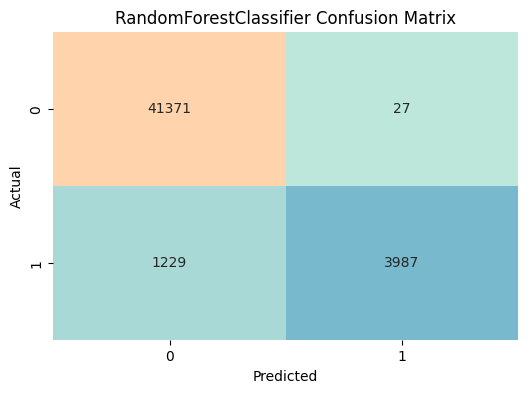

In [ ]:
# confusion matrix visualization
cm_visualization(rf, rf_result['Confusion Matrix'], labels=np.unique(y_test))

> Hasil evaluasi model sebelum *hyperparameter tuning*:
- **Akurasi** yang sangat **tinggi**, tetapi berkemungkinan mengalami ***overfitting*** terlihat dari *training accuracy* = 1.0 (sempurna), yang berarti model hanya menghafal data latih tanpa generalisasi yang baik.
- **Precision** sangat **tinggi** (0.993) yang berarti model hampir tidak memiliki kasus *false positive* (peminjam dengan risiko tinggi yang diklasifikasikan sebagai "*good risk*").
- **Recall** sebesar 0.764, **lebih rendah** dibandingkan model Logistic Regression.
- **F1-Score dan ROC-AUC lebih tinggi** dibandingkan model sebelumnya, tetapi tetap perlu **diwaspadai** karena indikasi ***overfitting***.

####**3. XGBoost**

In [ ]:
# XGBoost model
xgb = XGBClassifier(eval_metric='logloss', random_state=42)

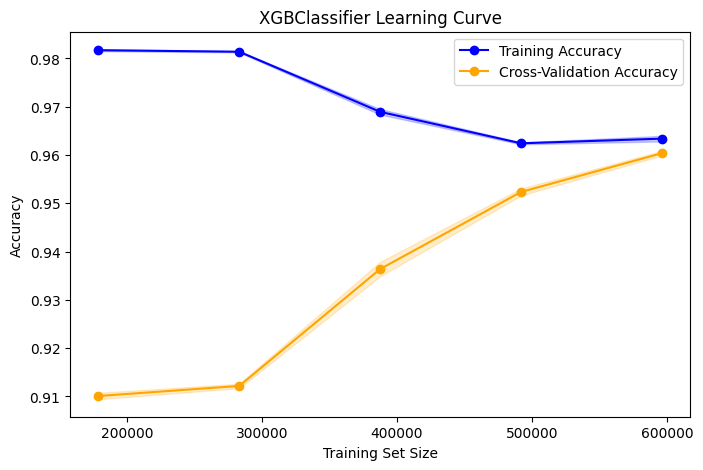

In [ ]:
# learning curve
learning_curve_plot(xgb, X_tr_resampled, y_tr_resampled)

In [ ]:
# model training
xgb.fit(X_tr_resampled, y_tr_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
# model evaluation
xgb_result = evaluate_model(xgb, X_test, y_test)

==== XGBClassifier ====

Confusion Matrix
[[41333    65]
 [ 1048  4168]]

Metrics Score (Cross-Validated)
Accuracy: 0.976
Precision: 0.985
Recall: 0.799
F1-Score: 0.882
ROC-AUC: 0.957

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     41398
           1       0.98      0.80      0.88      5216

    accuracy                           0.98     46614
   macro avg       0.98      0.90      0.93     46614
weighted avg       0.98      0.98      0.98     46614



In [ ]:
# training and testing accuracy gap
train_test_acc(xgb, X_tr_resampled, y_tr_resampled, X_test, y_test)

Training accuracy: 0.963
Testing accuracy: 0.973


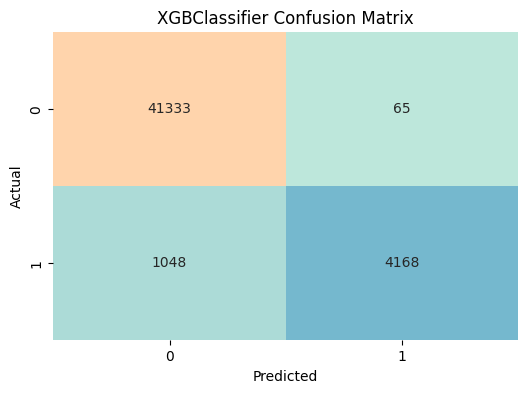

In [ ]:
# confusion matrix visualization
cm_visualization(xgb, xgb_result['Confusion Matrix'], labels=np.unique(y_test))

> Hasil evaluasi model:
- **Akurasi** mencapai 0.976.
- Meskipun *learning curve* menunjukkan sedikit penurunan pada *training accuracy*, perbedaannya tidak signifikan, dan *gap* antara *training dan testing accuracy* sangat kecil, menandakan model ini **melakukan generalisasi dengan lebih baik**.
- **Precision, F1-Score, dan ROC-AUC tinggi** menunjukkan performa yang baik dalam mengklasifikasikan risiko kredit.
- **Recall** lebih rendah dibandingkan Logistic Regression, tetapi tetap mendekati 0.8 sehingga **masih cukup baik** dalam mendeteksi peminjam dengan risiko kredit tinggi.

### **Hyperparameter Tuning**

> Dilakukan *hyperparameter tuning* terhadap dua model, yaitu **Logistic Regression** dan **Random Forest Classifier**. Namun, pendekatan yang digunakan berbeda
- **Logistic Regression** menggunakan **GridSearchCV** karena parameter yang perlu dicoba relatif lebih sedikit dan menggunakan komputasi yang lebih ringan.
- **Random Forest Classifier** menggunakan **RandomizedSearchCV** untuk mengurangi biaya komputasi.

#### **Logistic Regression Using GridSearchCV**

In [ ]:
# baseline model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# define param grid
log_reg_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'saga', 'liblinear'],
    'class_weight': [None, 'balanced']
}

# initialize GridSearchCV
grid_log_reg = GridSearchCV(estimator=log_reg, param_grid=log_reg_param_grid, cv=3, n_jobs=1, verbose=2)
grid_log_reg.fit(X_tr_resampled, y_tr_resampled)

# save best model
print(f'Grid Search Logistic Regression Best Params: {grid_log_reg.best_params_}')
best_lr_grid = grid_log_reg.best_estimator_

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] END ...........C=0.001, class_weight=None, solver=lbfgs; total time=   1.1s
[CV] END ...........C=0.001, class_weight=None, solver=lbfgs; total time=   1.2s
[CV] END ...........C=0.001, class_weight=None, solver=lbfgs; total time=   1.2s
[CV] END ............C=0.001, class_weight=None, solver=saga; total time=   6.0s
[CV] END ............C=0.001, class_weight=None, solver=saga; total time=   5.1s
[CV] END ............C=0.001, class_weight=None, solver=saga; total time=   5.1s
[CV] END .......C=0.001, class_weight=None, solver=liblinear; total time=   2.8s
[CV] END .......C=0.001, class_weight=None, solver=liblinear; total time=   2.5s
[CV] END .......C=0.001, class_weight=None, solver=liblinear; total time=   2.3s
[CV] END .......C=0.001, class_weight=balanced, solver=lbfgs; total time=   1.2s
[CV] END .......C=0.001, class_weight=balanced, solver=lbfgs; total time=   1.3s
[CV] END .......C=0.001, class_weight=balanced, 

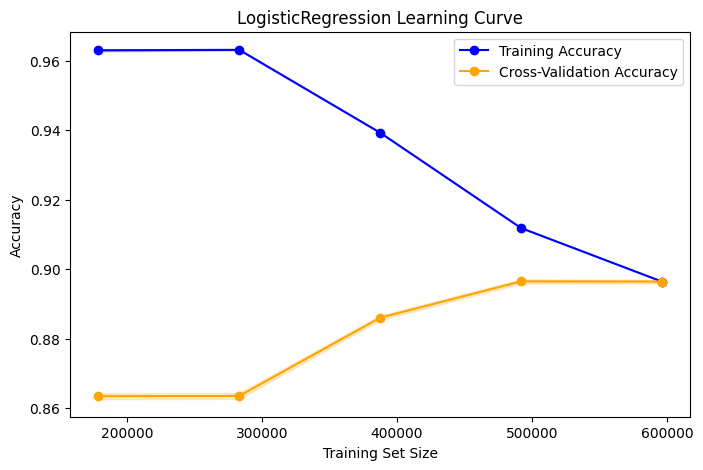

In [ ]:
# learning curve after tuning
learning_curve_plot(best_lr_grid, X_tr_resampled, y_tr_resampled)

In [ ]:
# model evaluation after tuning
best_lr_result = evaluate_model(best_lr_grid, X_test, y_test)

==== LogisticRegression ====

Confusion Matrix
[[41164   234]
 [ 1502  3714]]

Metrics Score (Cross-Validated)
Accuracy: 0.963
Precision: 0.941
Recall: 0.712
F1-Score: 0.811
ROC-AUC: 0.935

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     41398
           1       0.94      0.71      0.81      5216

    accuracy                           0.96     46614
   macro avg       0.95      0.85      0.89     46614
weighted avg       0.96      0.96      0.96     46614



In [ ]:
# training and testing accuracy gap
train_test_acc(best_lr_grid, X_tr_resampled, y_tr_resampled, X_test, y_test)

Training accuracy: 0.896
Testing accuracy: 0.933


> Hasil evaluasi model setelah hyperparameter tuning tidak menunjukkan perbedaan yang signifikan. Namun, nilai precision menjadi jauh lebih meningkat, sementara recall sedikit menurun tetapi masih dalam batasan yang baik. Hal ini menyebabkan peningkatan terhadap nilai f1-score juga. Oleh karena itu, model ini digunakan sebagai representasi model Logistic Regression untuk dibandingkan dengan model lainnya.


#### **Random Forest Using RandomizedCV**

In [ ]:
# baseline model
random_forest = RandomForestClassifier(random_state=42)

# param dist
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 7, 10, 12, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}

# initialize RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    estimator=random_forest, param_distributions=param_dist, n_iter=3, scoring='f1', cv=3, n_jobs=-1, verbose=2, random_state=42
    )
random_search_rf.fit(X_tr_resampled, y_tr_resampled)

# save best model
print(f'Random Search RF Best Params: {random_search_rf.best_params_}')
best_rf_random = random_search_rf.best_estimator_

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Random Search RF Best Params: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': None}


In [ ]:
# model evaluation after tuning
best_rf_result = evaluate_model(best_rf_random, X_test, y_test)

==== RandomForestClassifier ====

Confusion Matrix
[[41373    25]
 [ 1334  3882]]

Metrics Score (Cross-Validated)
Accuracy: 0.971
Precision: 0.994
Recall: 0.744
F1-Score: 0.851
ROC-AUC: 0.951

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     41398
           1       0.99      0.74      0.85      5216

    accuracy                           0.97     46614
   macro avg       0.98      0.87      0.92     46614
weighted avg       0.97      0.97      0.97     46614



In [ ]:
# training and testing accuracy gap
train_test_acc(best_rf_random, X_tr_resampled, y_tr_resampled, X_test, y_test)

Training accuracy: 0.981
Testing accuracy: 0.977


> Model Random Forest setelah melalui proses *tuning* mengalami peningkatan performa dan tidak terlalu *overfitting* (terlihat dari *gap* antara *training* dan *testing accuracy* yang lebih kecil serta *training accuracy* yang tidak lagi 1.0). Oleh karena itu, model ini dipilih sebagai representasi Random Forest Classifier untuk dibandingkan dengan model lainnya.

### **Summary**

In [ ]:
print(best_lr_result)
print(best_rf_result)
print(xgb_result)

{'Confusion Matrix': array([[41164,   234],
       [ 1502,  3714]]), 'Accuracy': np.float64(0.963), 'Precision': np.float64(0.941), 'Recall': np.float64(0.712), 'F1-Score': {np.float64(0.811)}, 'ROC-AUC': {np.float64(0.935)}}
{'Confusion Matrix': array([[41373,    25],
       [ 1334,  3882]]), 'Accuracy': np.float64(0.971), 'Precision': np.float64(0.994), 'Recall': np.float64(0.744), 'F1-Score': {np.float64(0.851)}, 'ROC-AUC': {np.float64(0.951)}}
{'Confusion Matrix': array([[41333,    65],
       [ 1048,  4168]]), 'Accuracy': np.float64(0.976), 'Precision': np.float64(0.985), 'Recall': np.float64(0.799), 'F1-Score': {np.float64(0.882)}, 'ROC-AUC': {np.float64(0.957)}}


> Kode di atas menampilkan hasil evaluasi model yang tersimpan dalam bentuk dictionary. Namun, nilai F1-Score dan ROC-AUC tersimpan dalam bentuk set sehingga perlu diekstraksi terlebih dahulu sebelum dimasukkan ke dalam tabel hasil evaluasi.

In [ ]:
# function to extract the value inside the set for f1-score and roc-auc
def extract_value_set(metrics_dict):
  for key, value in metrics_dict.items():
    if isinstance(value, set):
      metrics_dict[key] = list(value)[0]
  return metrics_dict

In [ ]:
# model summary dict
model_summary = {
    'Logistic Regression': extract_value_set(best_lr_result),
    'Random Forest': extract_value_set(best_rf_result),
    'XGBBoost': extract_value_set(xgb_result)
}

# model summary dataframe
summary_df = pd.DataFrame.from_dict(model_summary, orient='index')[['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']]

summary_df.reset_index(inplace=True)
summary_df.rename(columns={'index': 'Model'}, inplace=True)

summary_df

Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC
0  Logistic Regression     0.963      0.941   0.712     0.811    0.935
1        Random Forest     0.971      0.994   0.744     0.851    0.951
2             XGBBoost     0.976      0.985   0.799     0.882    0.957

In [ ]:
# visualize the metrics score
def plot_model_performance(df, metrics):
  df_melted = df.melt(id_vars=['Model'], value_vars=metrics, var_name='Metric', value_name='Score')

  fig, axes = plt.subplots(1, len(metrics), figsize=(18,5), sharey=True)

  for i, metric in enumerate(metrics):
    ax = axes[i]
    sns.barplot(data=df_melted[df_melted['Metric'] == metric],
                x='Model',
                y='Score',
                ax=ax,
                hue='Model',
                palette='viridis')

    ax.set_title(metric, fontsize=12),
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xticks(range(len(df['Model'])))
    ax.set_xticklabels(df['Model'], rotation=30)

    for p in ax.patches:
      ax.text(p.get_x() + p.get_width() / 2,
              p.get_height() + 0.01,
              f'{p.get_height():.3f}',
              ha='center', va='bottom', fontsize=10)

  plt.tight_layout()
  plt.show()

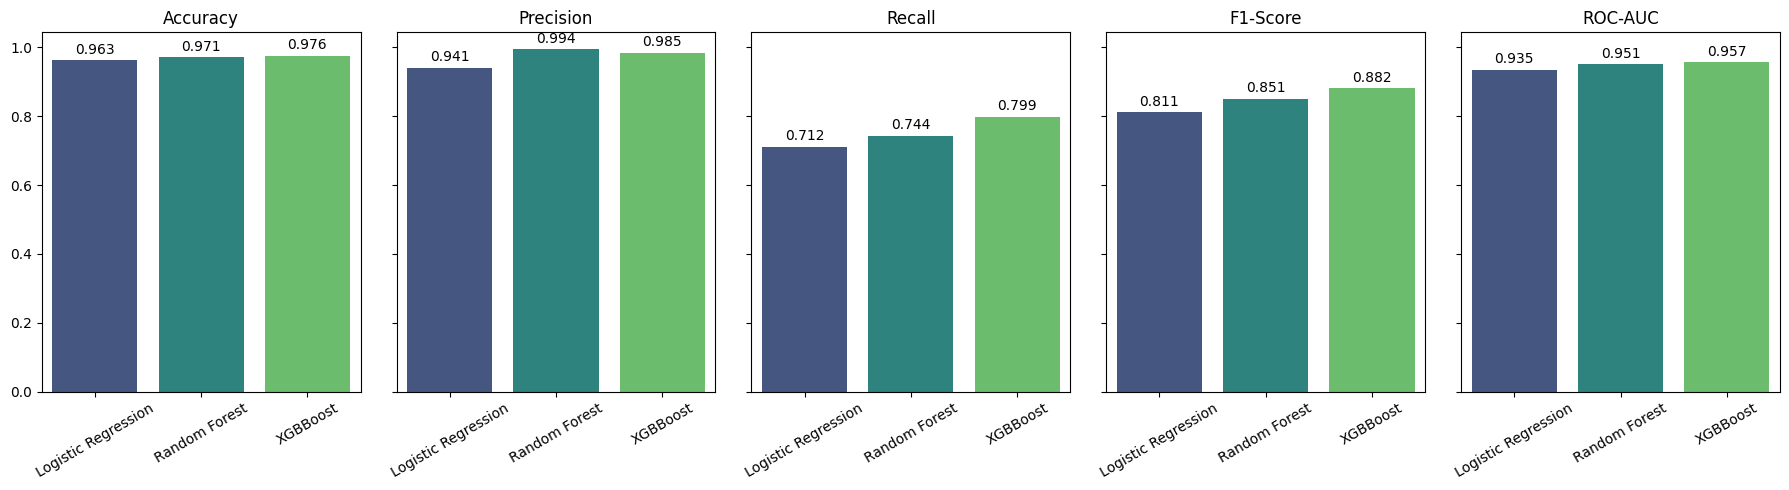

In [ ]:
# function call
plot_model_performance(summary_df, ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'])

> Kesimpulan:
- **XGBoost** adalah model dengan **performa keseluruhan terbaik**.
- **Random Forest Classifier** menempati **peringkat kedua** dalam performa, meskipun **cenderung rentan terhadap *overfitting***. Hal ini telah diminimalkan dengan melakukan *hyperparameter tuning* menggunakan `RandomizedSearchCV` untuk menghindari komputasi yang terlalu berat.
- **Logistic Regression** menunjukkan indikasi ***underfitting*** yang terlihat dari *learning curve*, baik sebelum maupun setelah *tuning*.
- Ketiga model memiliki precision yang sangat baik, tetapi **nilai recall cenderung rendah**, kecuali XGBoost. Hal ini menjadi perhatian apabila recall diutamakan (untuk mengidentifikasi bad risks dengan lebih akurat).
- Nilai **F1-score** ketiga model melebihi 0.8 yang menunjukkan bahwa **model sudah cukup baik dalam menyeimbangkan precision dan recall**.